In [51]:
%%javascript
<!-- Ignore this block -->
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [52]:
%config InlineBackend.figure_format = 'retina'

from __future__ import division
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [53]:
""" File path change accordingly"""
directoryPath = "Data"

wineData = pd.read_csv(directoryPath+"/winequality-red.csv", sep=";")
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [54]:
wineData.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Visualize data

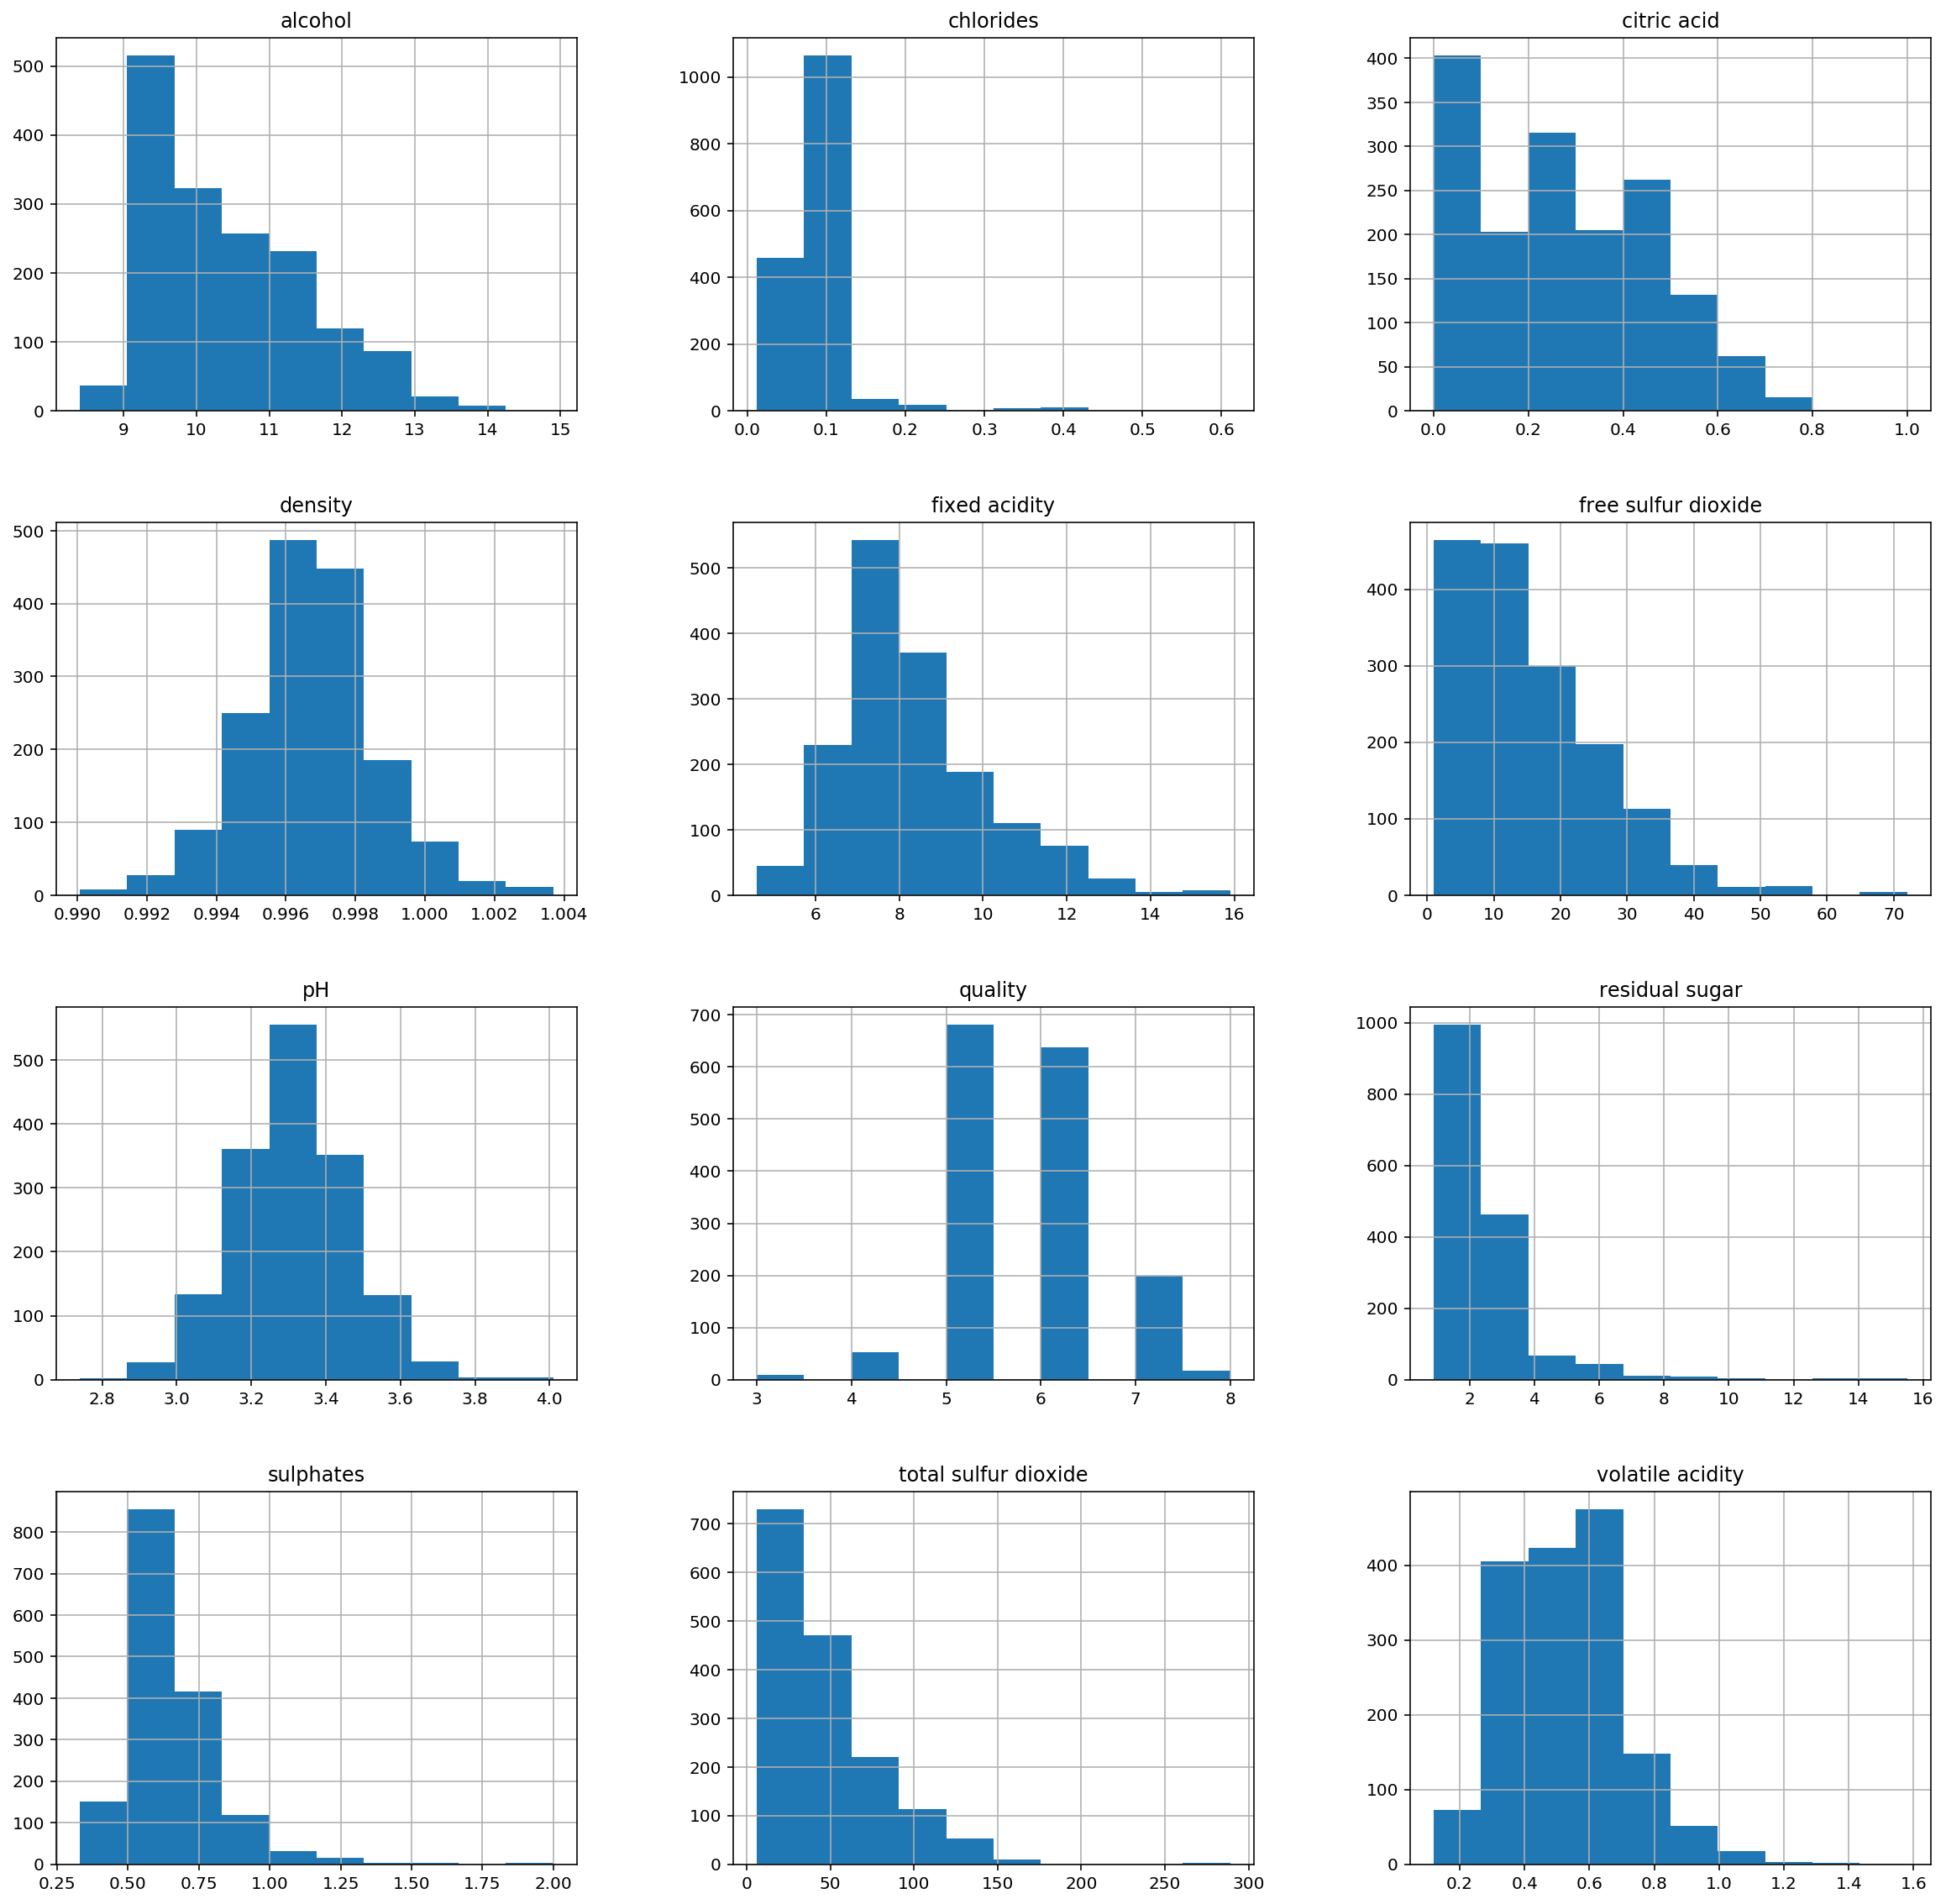

In [55]:
wineData.hist(figsize = (20, 20))
plt.show()

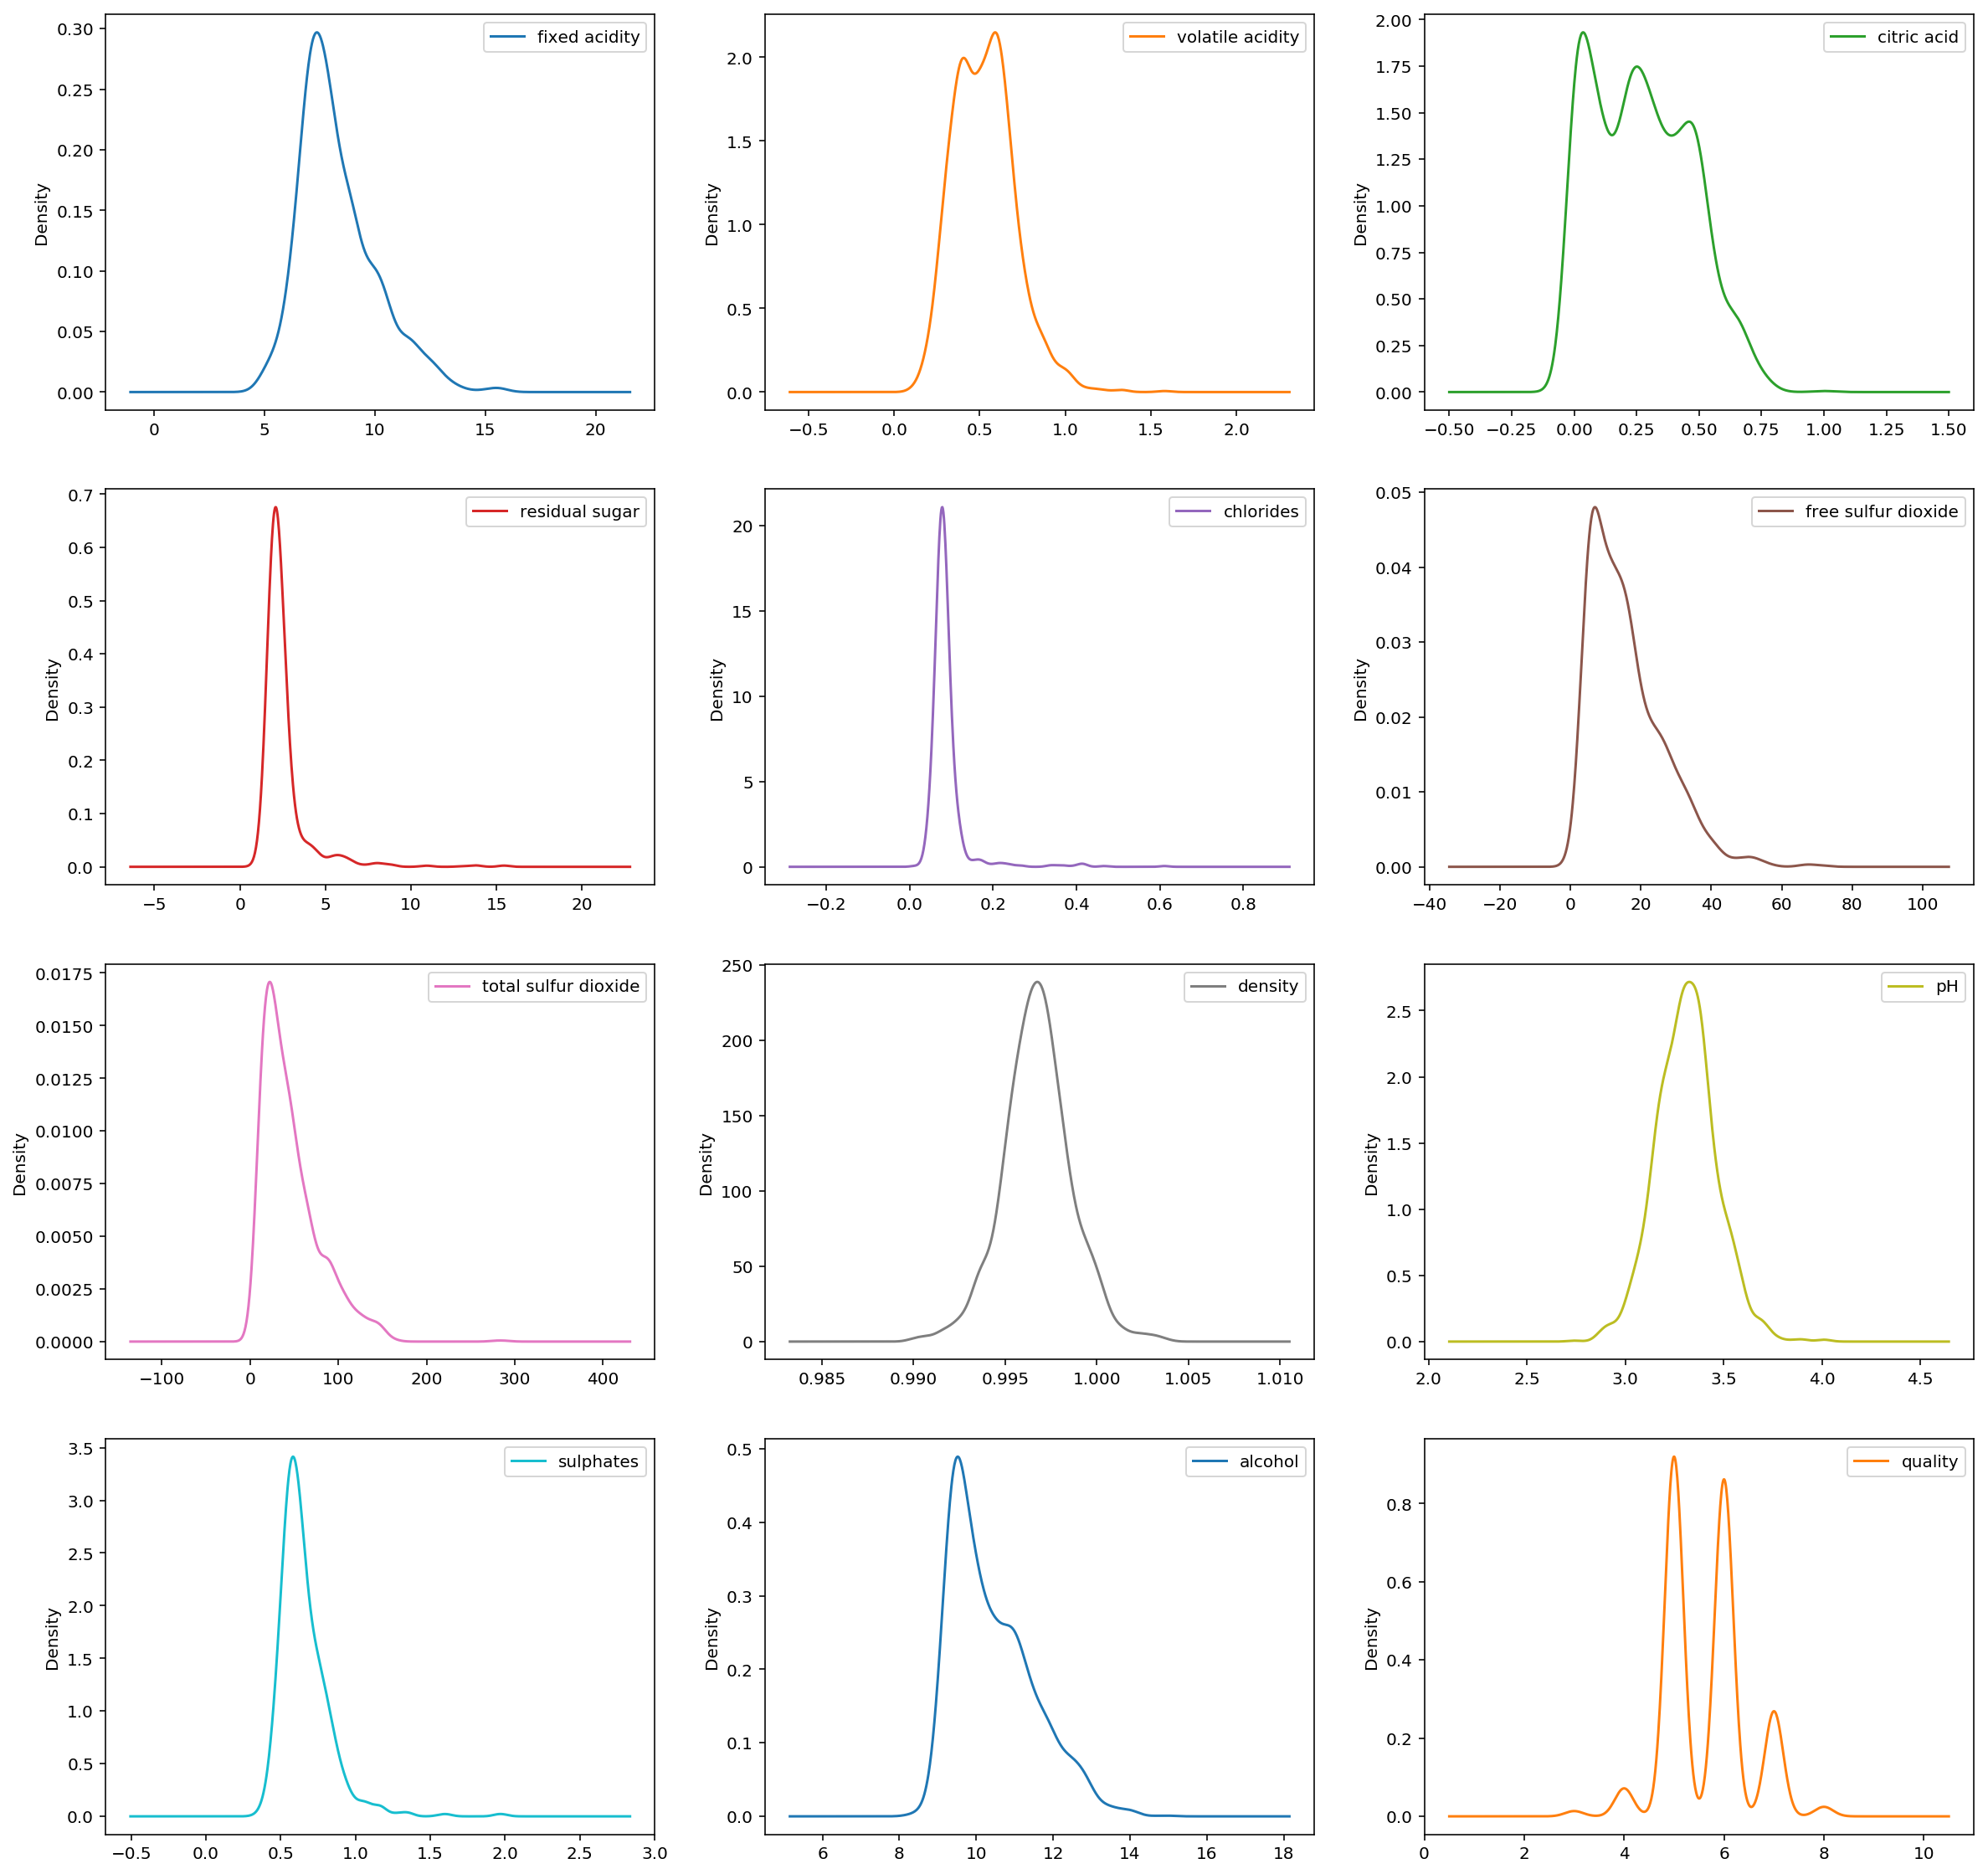

In [56]:
wineData.plot(kind='density', subplots=True, layout=(4,3), sharex=False, figsize = (20, 20))
plt.show()

In [57]:
correlation = wineData.corr(method = "spearman")
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.278282,0.661708,0.220701,0.250904,-0.175137,-0.088417,0.623071,-0.706674,0.212654,-0.066576,0.114084
volatile acidity,-0.278282,1.000000,-0.610259,0.032386,0.158770,0.021163,0.094110,0.025014,0.233572,-0.325584,-0.224932,-0.380647
citric acid,0.661708,-0.610259,1.000000,0.176417,0.112577,-0.076452,0.009400,0.352285,-0.548026,0.331074,0.096456,0.213481
residual sugar,0.220701,0.032386,0.176417,1.000000,0.212959,0.074618,0.145375,0.422266,-0.089971,0.038332,0.116548,0.032048
chlorides,0.250904,0.158770,0.112577,0.212959,1.000000,0.000805,0.130033,0.411390,-0.234361,0.020825,-0.284504,-0.189922
free sulfur dioxide,-0.175137,0.021163,-0.076452,0.074618,0.000805,1.000000,0.789698,-0.041178,0.115679,0.045862,-0.081367,-0.056901
total sulfur dioxide,-0.088417,0.094110,0.009400,0.145375,0.130033,0.789698,1.000000,0.129332,-0.009841,-0.000504,-0.257806,-0.196735
density,0.623071,0.025014,0.352285,0.422266,0.411390,-0.041178,0.129332,1.000000,-0.312055,0.161478,-0.462445,-0.177074
pH,-0.706674,0.233572,-0.548026,-0.089971,-0.234361,0.115679,-0.009841,-0.312055,1.000000,-0.080306,0.179932,-0.043672
sulphates,0.212654,-0.325584,0.331074,0.038332,0.020825,0.045862,-0.000504,0.161478,-0.080306,1.000000,0.207330,0.377060


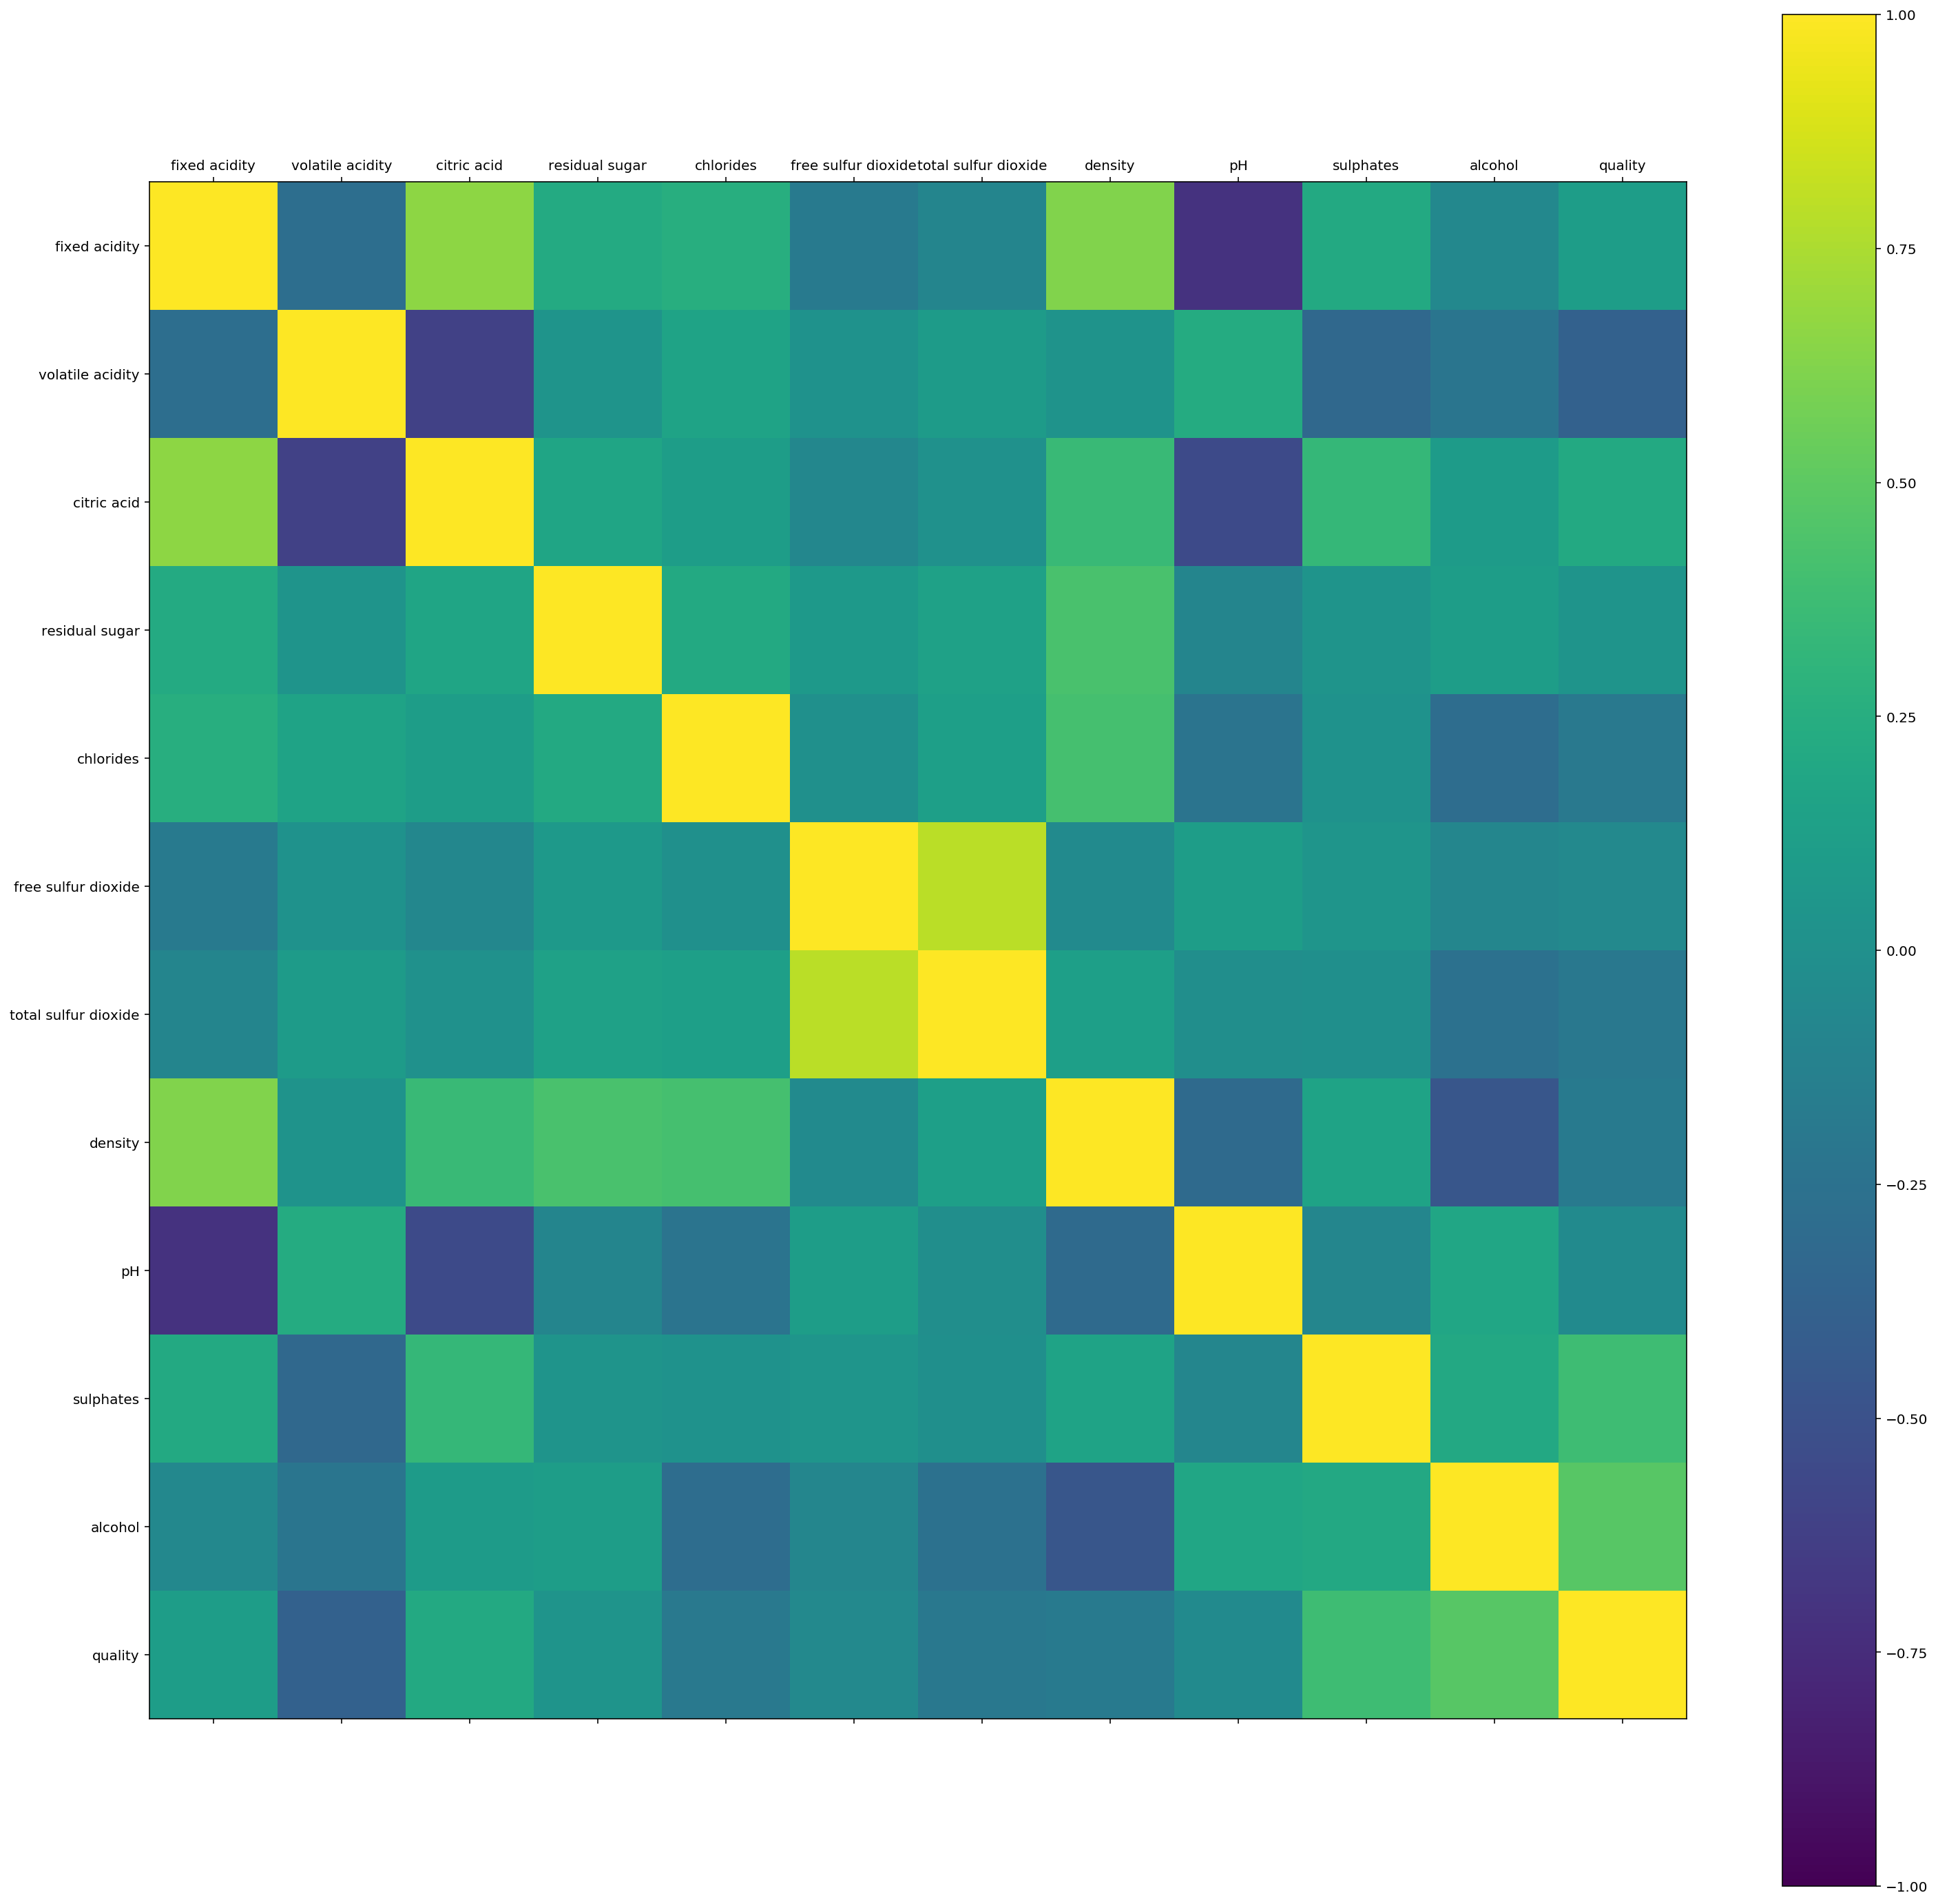

In [58]:
labels = list(wineData)
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
ax.matshow(correlation)

ticks = range(0, len(labels))
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)

ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

There is a very high corelation between total sulfur dioxide and free sulfur dioxide. One of these features can be dropped. Correlation of free sulfur dioxide is very less with quality as compared to total sulfur dioxide. So we will drop free sulfur dioxide. 

In [59]:
selectedFeatures = list(wineData)
selectedFeatures.remove('quality')
selectedFeatures.remove('free sulfur dioxide')

## Split dataset

In [60]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(wineData[selectedFeatures], wineData['quality'],
                                                test_size=0.2)

print("Train set size " +str(len(xTrain)))
print("Test set size " +str(len(xTest)))

Train set size 1279
Test set size 320


## Creating a pipeline
Here the pipeline included two steps.<br>
1) Feature scaling<br>
2) Training classification algorithm<br>

In [61]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

"""Pipeline will take care of transformation and fitting the model on it
Here the first step is to perform feature scaling
Second step is to fit the model for stochastic gradient descent Regression"""

trainingPipeline = Pipeline([
    ("featureScaling", StandardScaler()),
    ("regression", SGDRegressor())
])


"""No penalty and constant learning rate"""
pipelineParameters = {"regression__learning_rate":"constant", "regression__penalty":None}

## Training the model without regularization

In [62]:
from sklearn.metrics import mean_squared_error
"""Training without regularization"""


learningRates = np.arange(0.1, 0.9, 0.05)
trainRMSENoReg = []
testRMSENoReg = []

for learningRate in learningRates:
    pipelineParameters["regression__eta0"] = learningRate
    trainingPipeline.set_params(** pipelineParameters)
    trainingPipeline.fit(xTrain, yTrain)
    
    trainRMSENoReg.append(sqrt(mean_squared_error(yTrain, trainingPipeline.predict(xTrain))))
    testRMSENoReg.append(sqrt(mean_squared_error(yTest, trainingPipeline.predict(xTest))))

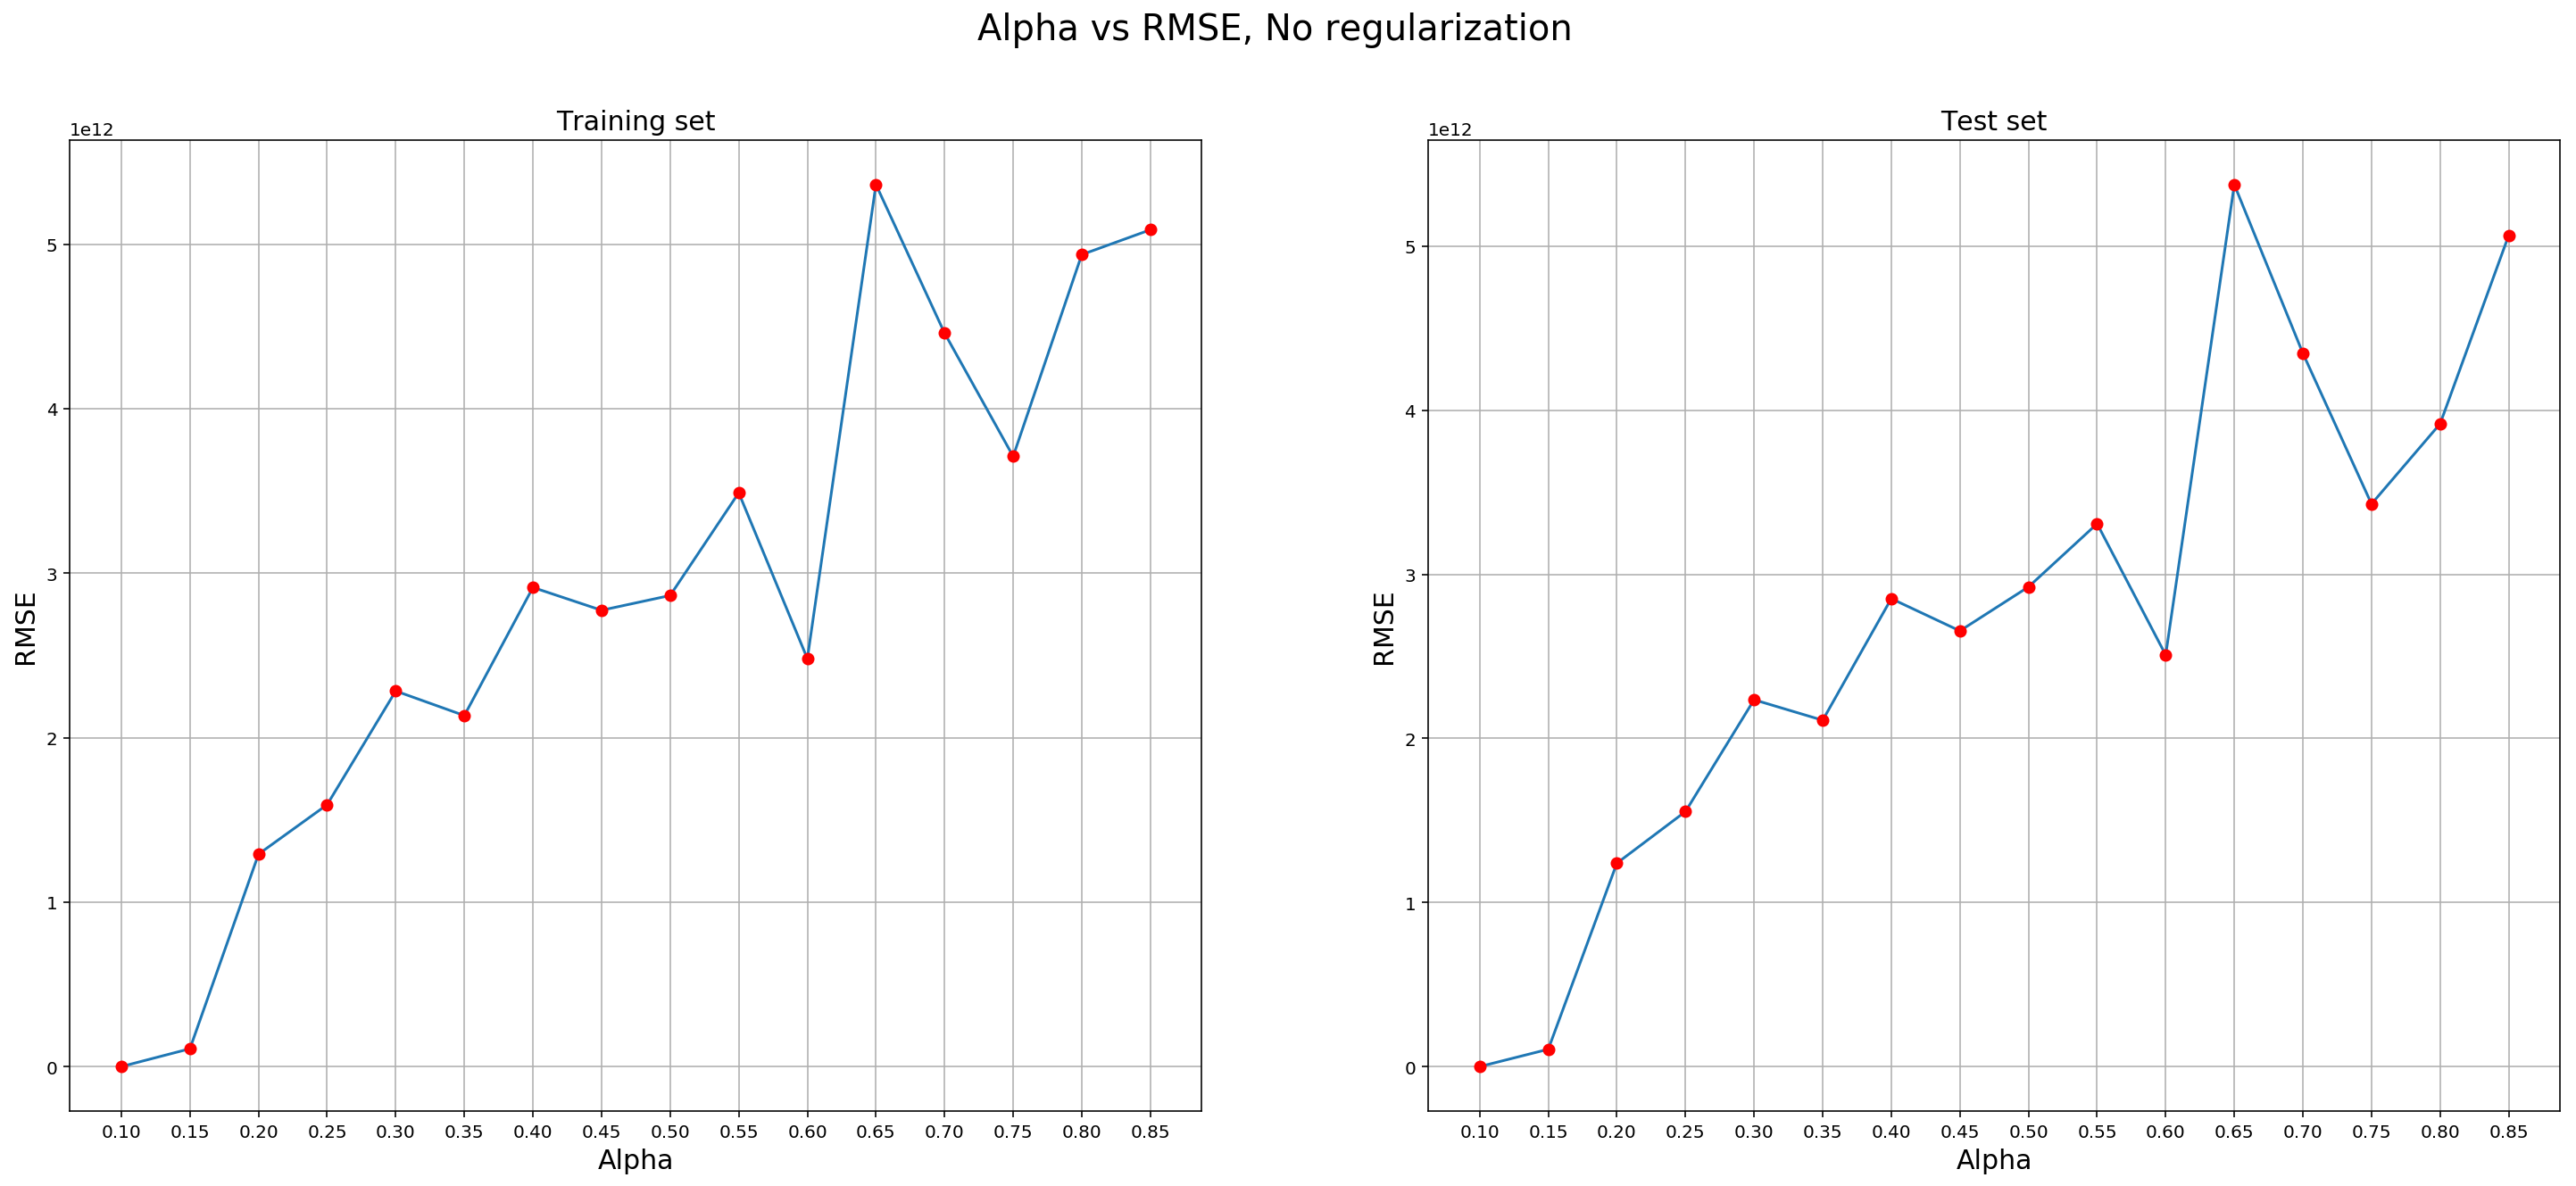

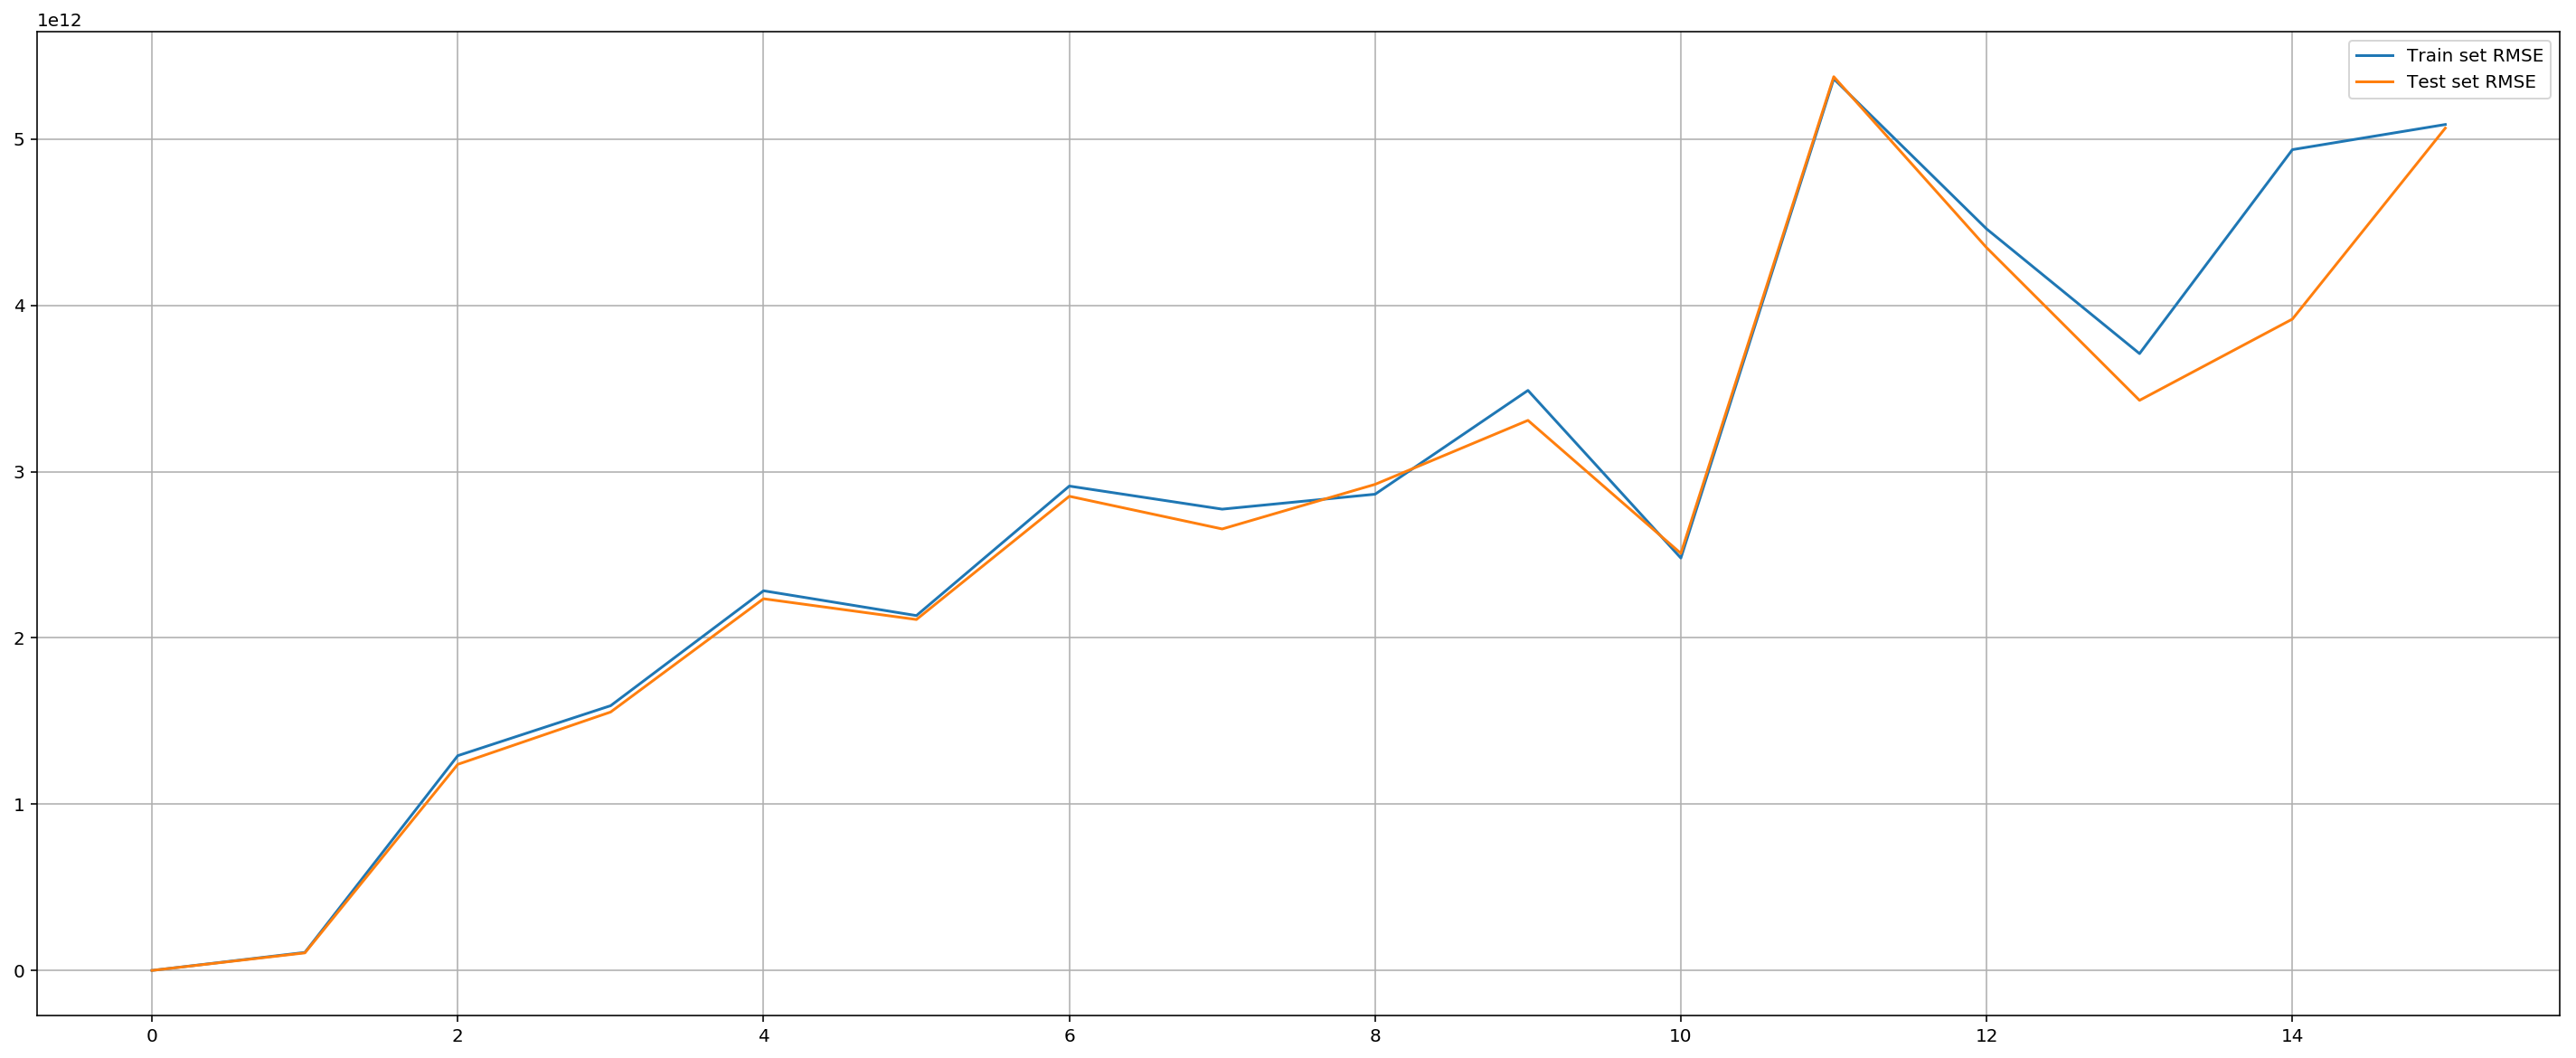

In [63]:
"""Plot the trained model"""

fig, axs = plt.subplots(1, 2, figsize=(25, 10))

fig.suptitle("Alpha vs RMSE, No regularization", fontsize = 20)
axs[0].plot(learningRates, trainRMSENoReg)
axs[0].plot(learningRates, trainRMSENoReg, "ro")
axs[0].grid()
axs[0].set_xticks(learningRates)
axs[0].set_xlabel('Alpha', fontsize = 15)
axs[0].set_ylabel('RMSE', fontsize = 15)
axs[0].set_title("Training set", fontsize = 15)

axs[1].plot(learningRates, testRMSENoReg)
axs[1].plot(learningRates, testRMSENoReg, "ro")
axs[1].grid()
axs[1].set_xticks(learningRates)
axs[1].set_xlabel('Alpha', fontsize = 15)
axs[1].set_ylabel('RMSE', fontsize = 15)
axs[1].set_title("Test set", fontsize = 15)
                  
plt.show()
plt.close()

fig, axs = plt.subplots(1, 1, figsize=(25, 10))
axs.plot(trainRMSENoReg, label = "Train set RMSE")
axs.plot(testRMSENoReg, label = "Test set RMSE")
axs.grid()
axs.legend()
plt.show()

Here we are not using any regularization. We can see that the error on train set is less than test error.

## Training the model with L2 loss (Ridge Regression)

In [64]:
pipelineParameters = {"regression__learning_rate":"constant", "regression__penalty":"l2",
                     "regression__alpha":0.01}

In [65]:
"""Training with L2 regularization"""


trainRMSERegL2 = []
testRMSERegL2 = []

for learningRate in learningRates:
    pipelineParameters["regression__eta0"] = learningRate
    trainingPipeline.set_params(** pipelineParameters)
    trainingPipeline.fit(xTrain, yTrain)
    
    trainRMSERegL2.append(sqrt(mean_squared_error(yTrain, trainingPipeline.predict(xTrain))))
    testRMSERegL2.append(sqrt(mean_squared_error(yTest, trainingPipeline.predict(xTest))))

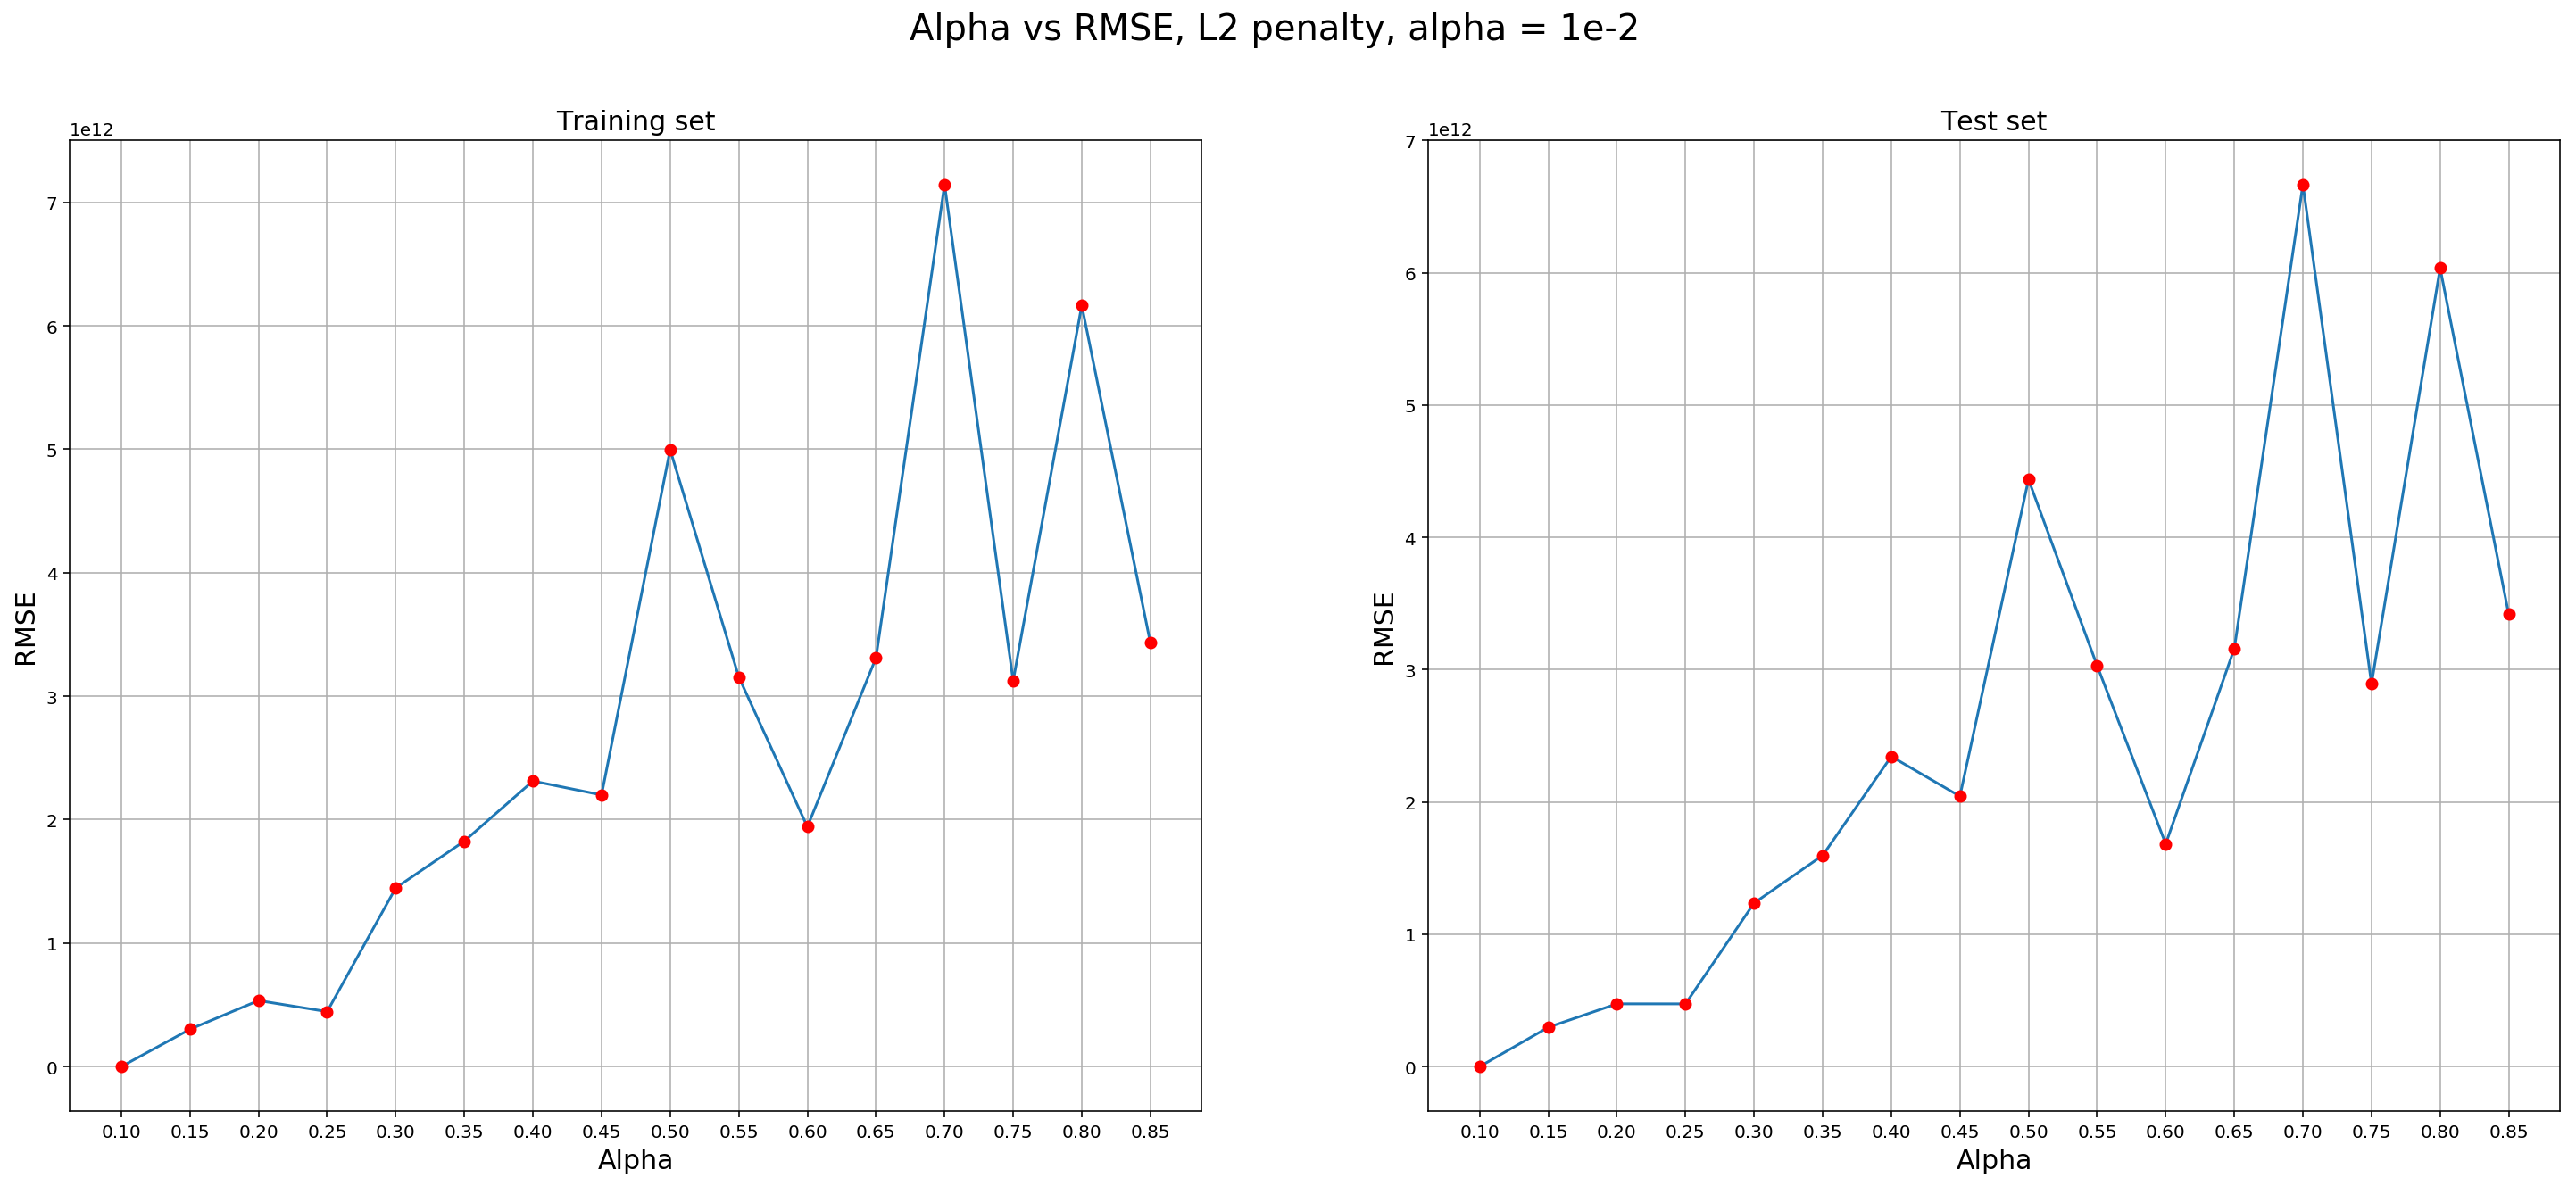

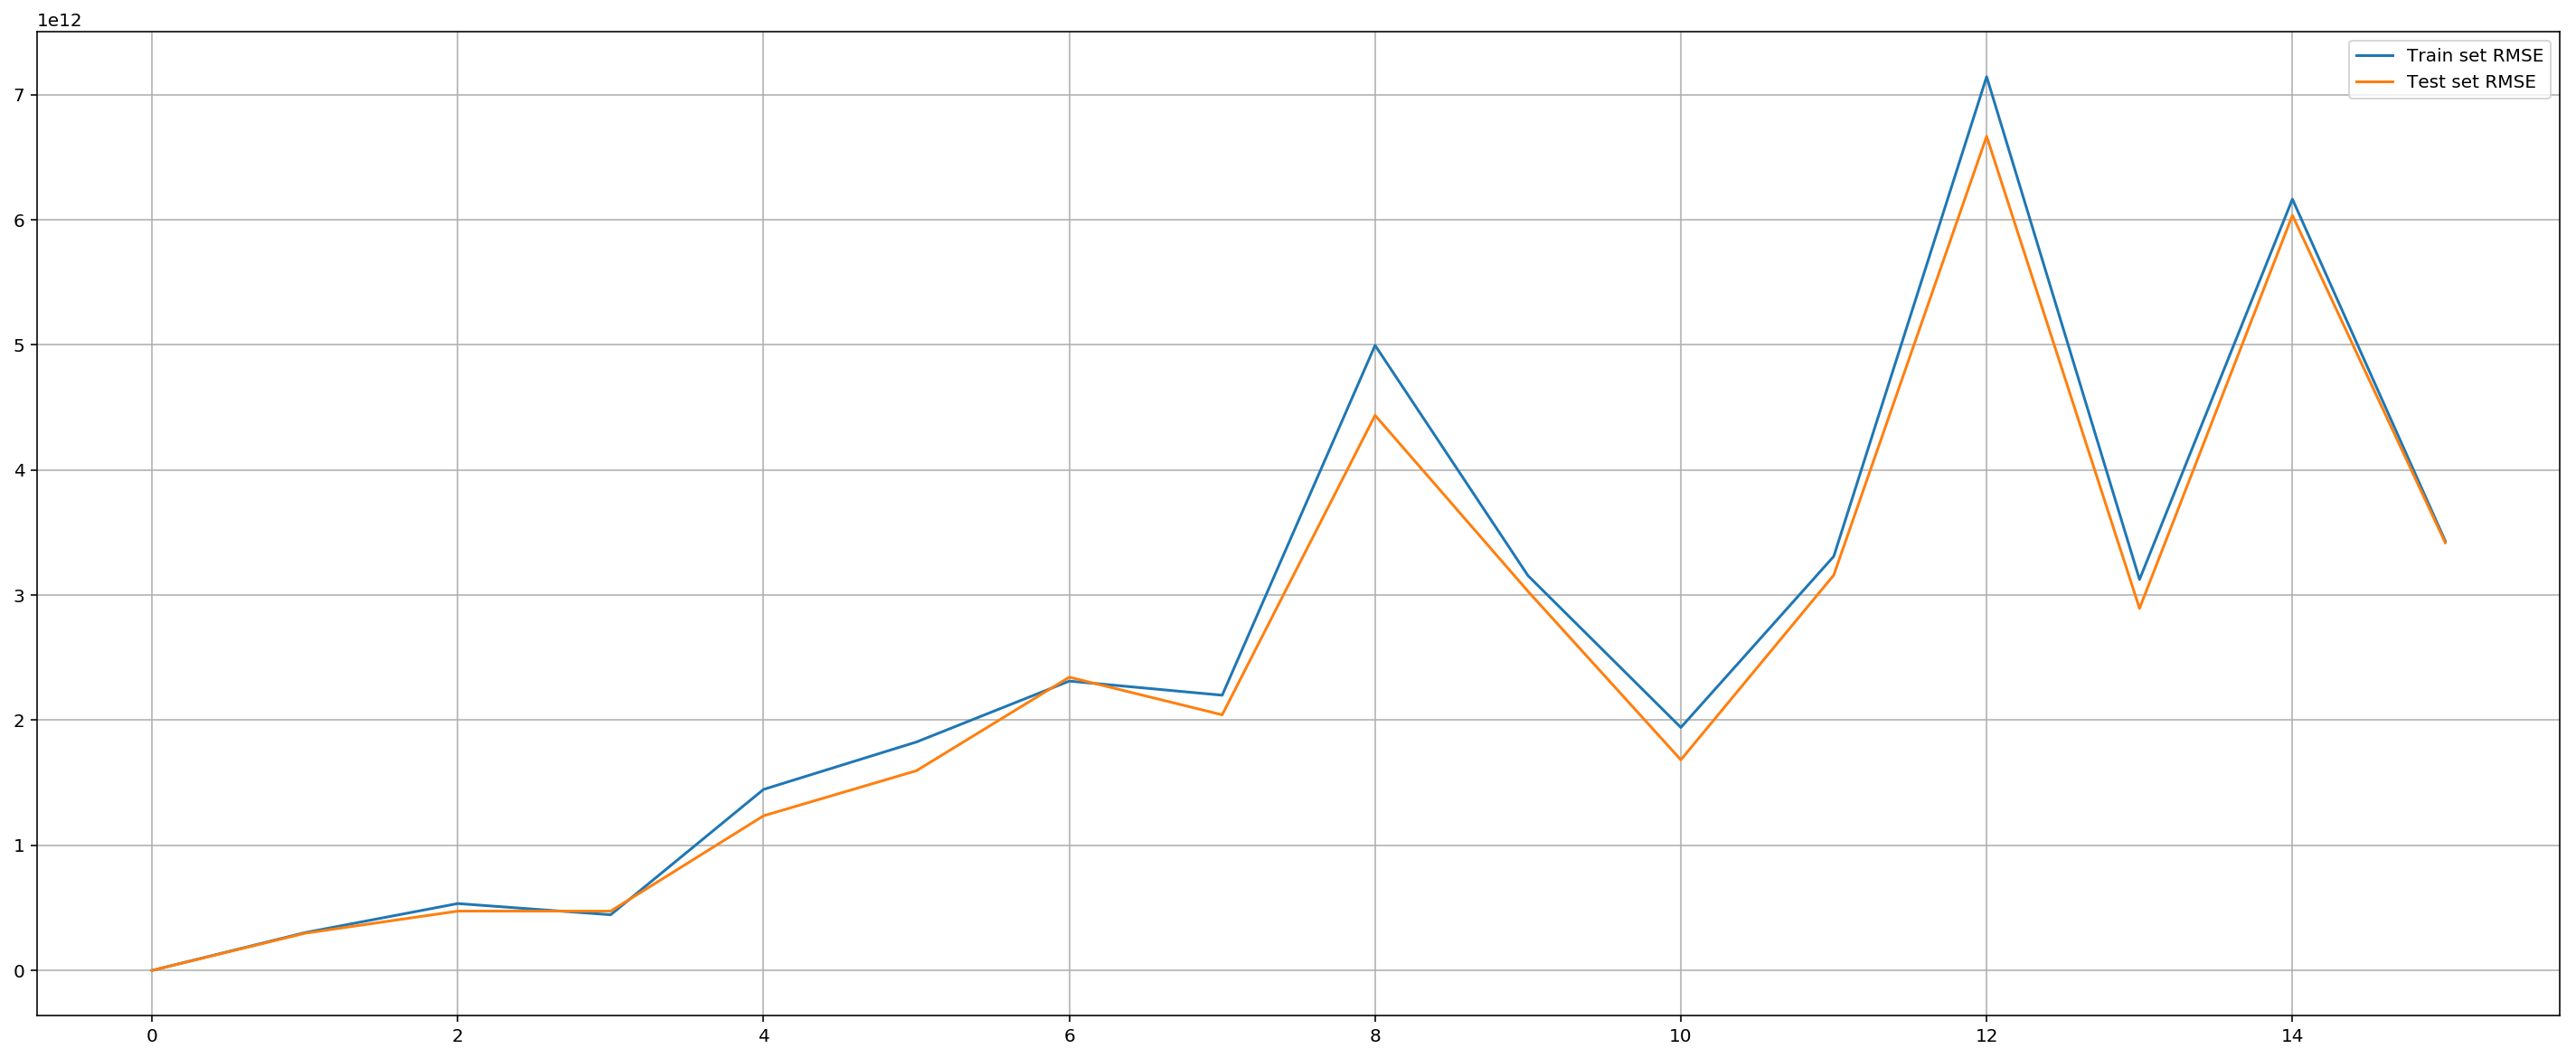

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

fig.suptitle("Alpha vs RMSE, L2 penalty, alpha = 1e-2", fontsize = 20)
axs[0].plot(learningRates, trainRMSERegL2)
axs[0].plot(learningRates, trainRMSERegL2, "ro")
axs[0].grid()
axs[0].set_xticks(learningRates)
axs[0].set_xlabel('Alpha', fontsize = 15)
axs[0].set_ylabel('RMSE', fontsize = 15)
axs[0].set_title("Training set", fontsize = 15)

axs[1].plot(learningRates, testRMSERegL2)
axs[1].plot(learningRates, testRMSERegL2, "ro")
axs[1].grid()
axs[1].set_xticks(learningRates)
axs[1].set_xlabel('Alpha', fontsize = 15)
axs[1].set_ylabel('RMSE', fontsize = 15)
axs[1].set_title("Test set", fontsize = 15)
                  
plt.show()
plt.close()

fig, axs = plt.subplots(1, 1, figsize=(25, 10))
axs.plot(trainRMSERegL2, label = "Train set RMSE")
axs.plot(testRMSERegL2, label = "Test set RMSE")
axs.legend()
axs.grid()
plt.show()

The behaviour is similar to what we saw above.

## Training the model with L1 loss (Lasso Regression)

In [67]:
pipelineParameters = {"regression__learning_rate":"constant", "regression__penalty":"l1",
                     "regression__alpha":0.001}

In [68]:
"""Training with L1 regularization"""


trainRMSERegL1 = []
testRMSERegL1 = []

for learningRate in learningRates:
    pipelineParameters["regression__eta0"] = learningRate
    trainingPipeline.set_params(** pipelineParameters)
    trainingPipeline.fit(xTrain, yTrain)
    
    trainRMSERegL1.append(sqrt(mean_squared_error(yTrain, trainingPipeline.predict(xTrain))))
    testRMSERegL1.append(sqrt(mean_squared_error(yTest, trainingPipeline.predict(xTest))))

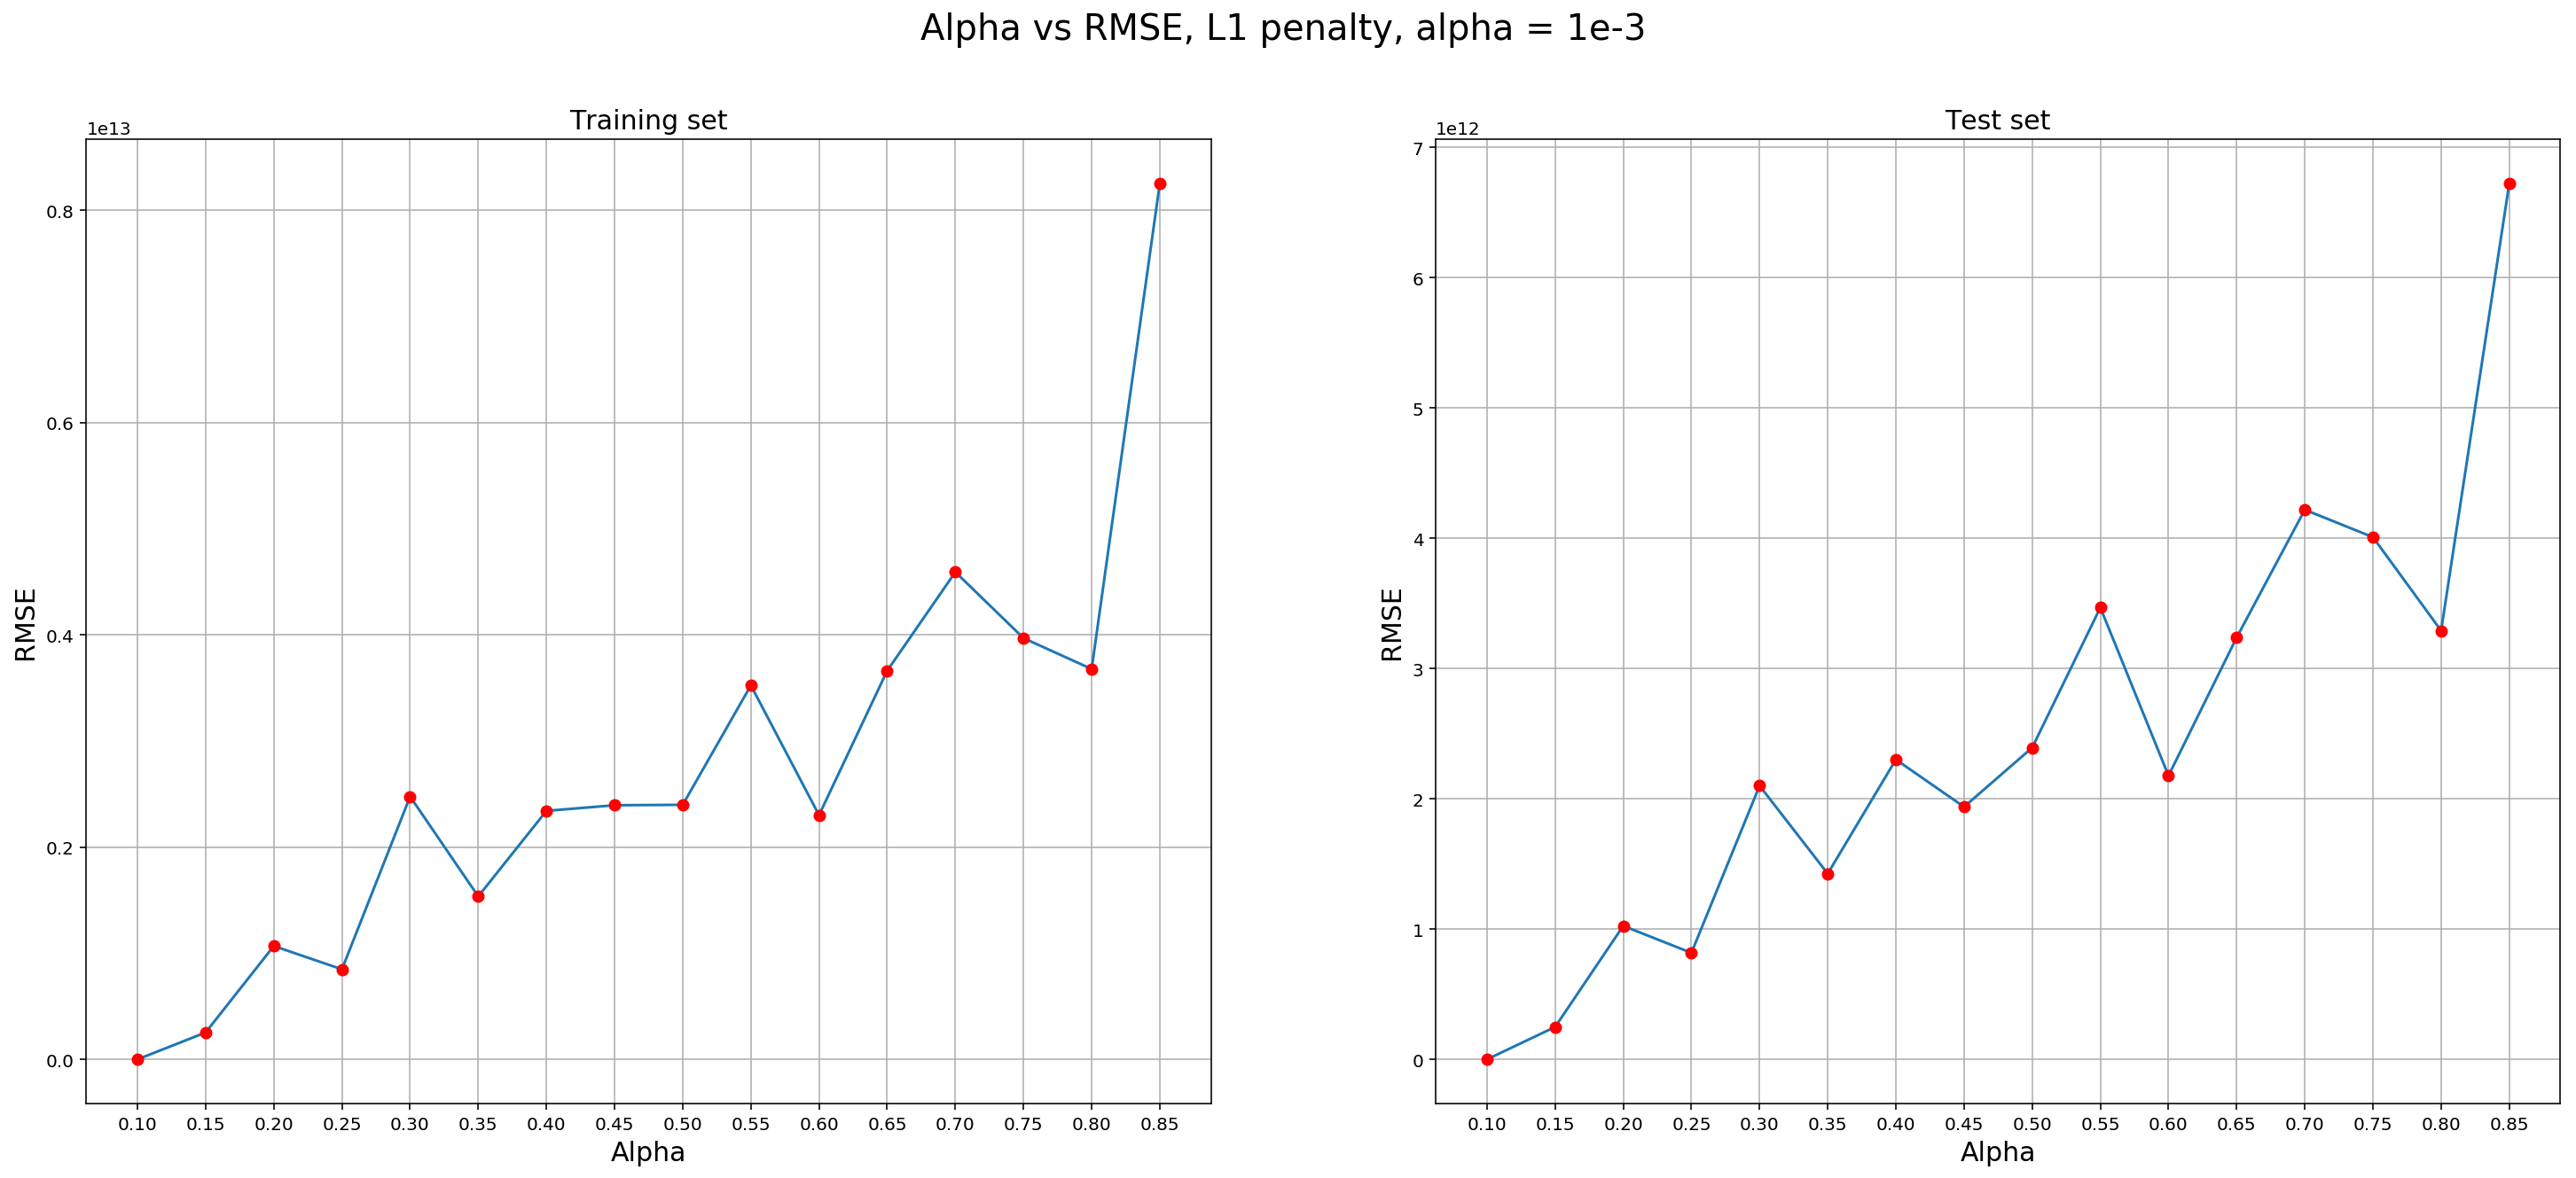

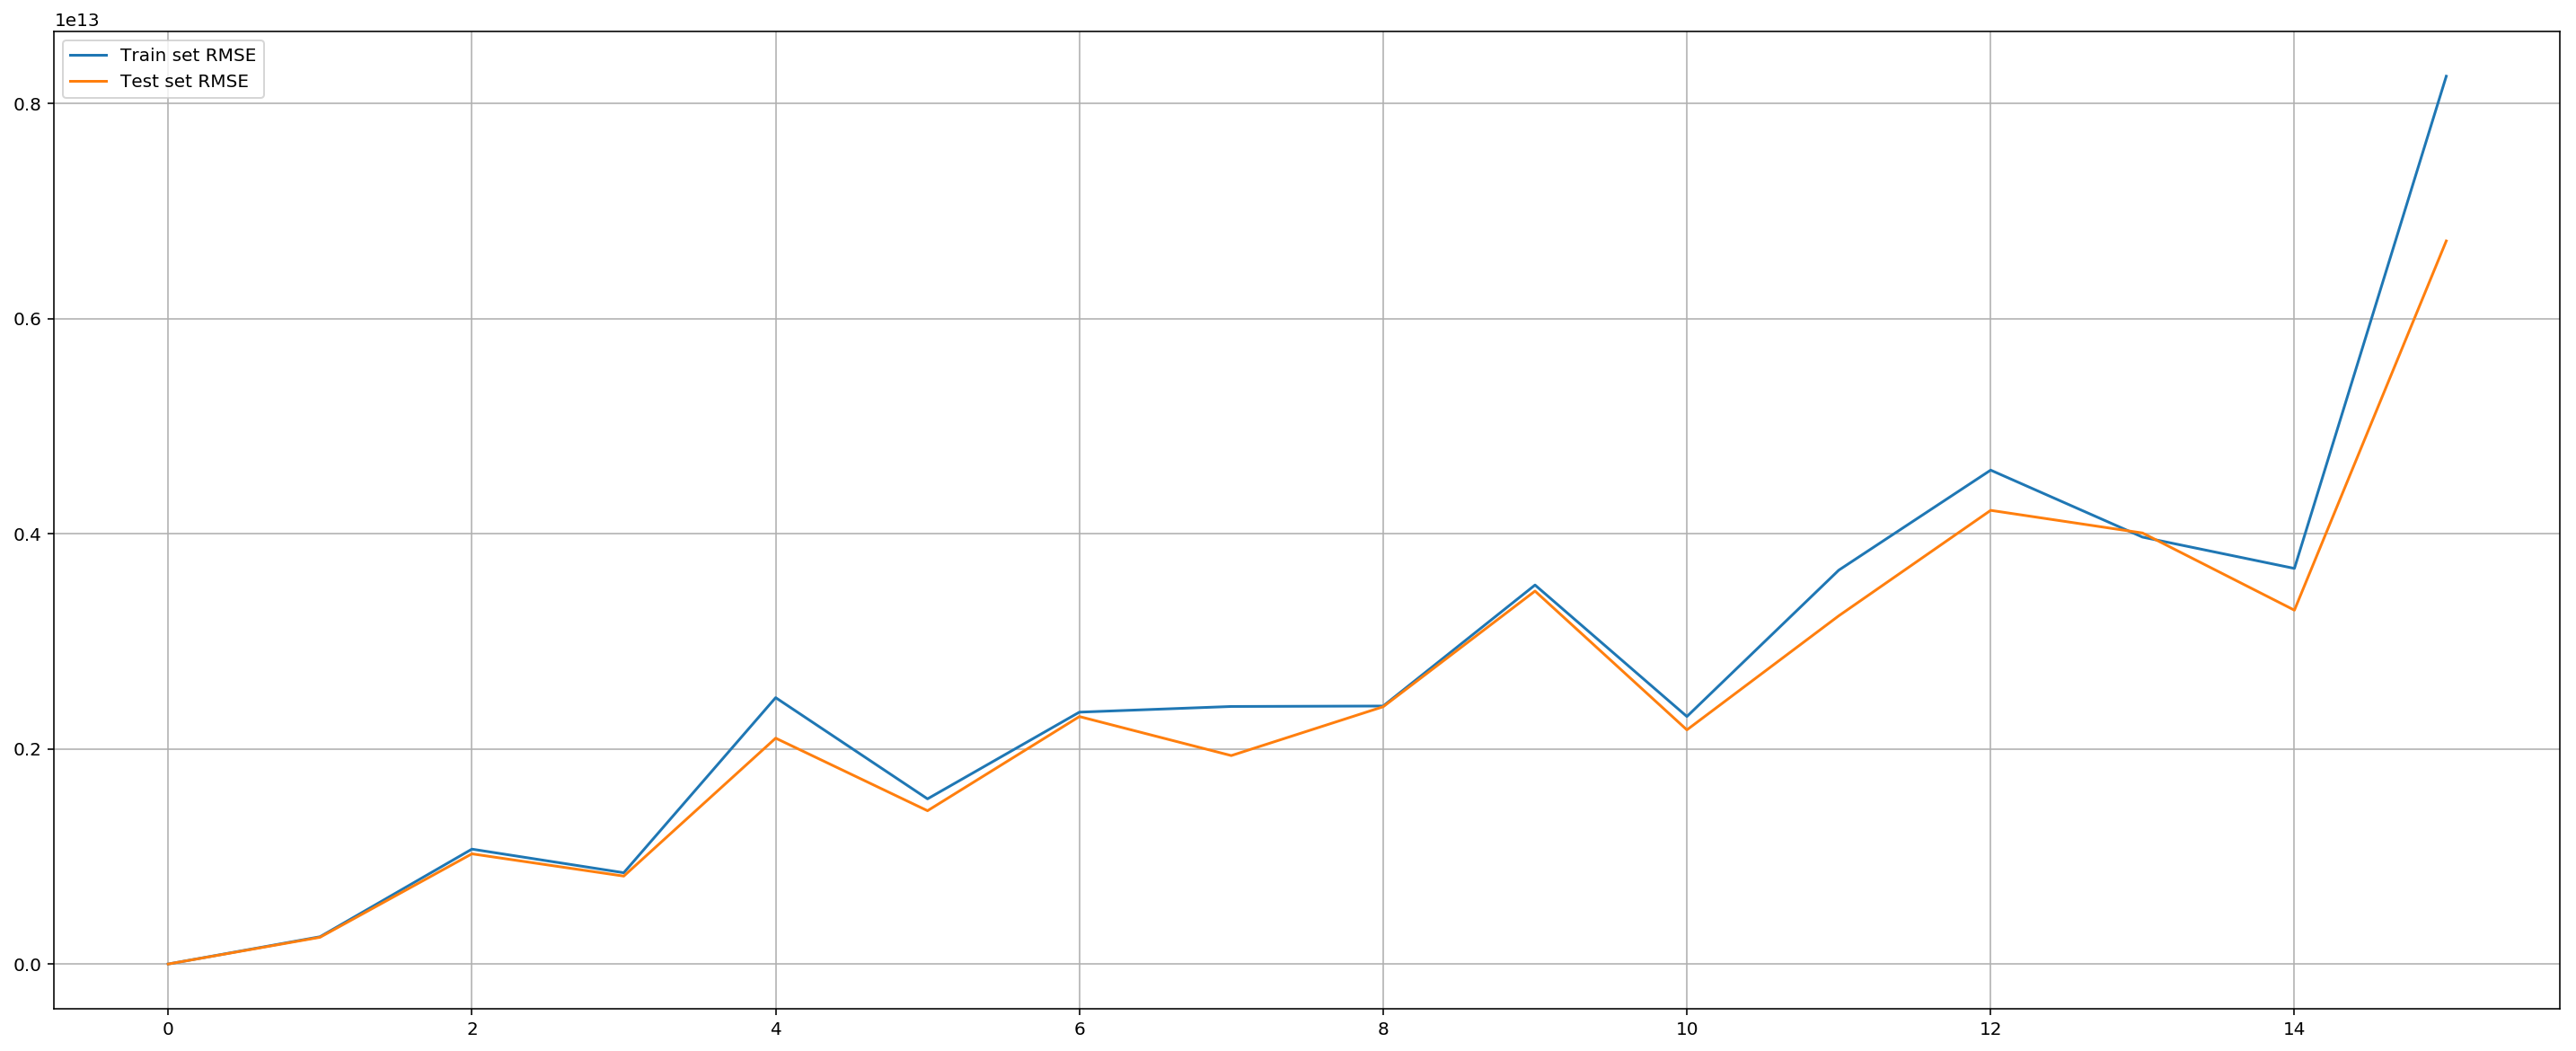

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

fig.suptitle("Alpha vs RMSE, L1 penalty, alpha = 1e-3", fontsize = 20)
axs[0].plot(learningRates, trainRMSERegL1)
axs[0].plot(learningRates, trainRMSERegL1, "ro")
axs[0].grid()
axs[0].set_xticks(learningRates)
axs[0].set_xlabel('Alpha', fontsize = 15)
axs[0].set_ylabel('RMSE', fontsize = 15)
axs[0].set_title("Training set", fontsize = 15)

axs[1].plot(learningRates, testRMSERegL1)
axs[1].plot(learningRates, testRMSERegL1, "ro")
axs[1].grid()
axs[1].set_xticks(learningRates)
axs[1].set_xlabel('Alpha', fontsize = 15)
axs[1].set_ylabel('RMSE', fontsize = 15)
axs[1].set_title("Test set", fontsize = 15)
                  
plt.show()
plt.close()


fig, axs = plt.subplots(1, 1, figsize=(25, 10))
axs.plot(trainRMSERegL1, label = "Train set RMSE")
axs.plot(testRMSERegL1, label = "Test set RMSE")
axs.grid()
axs.legend()
plt.show()

## Comparing regularized vs Non Regularized

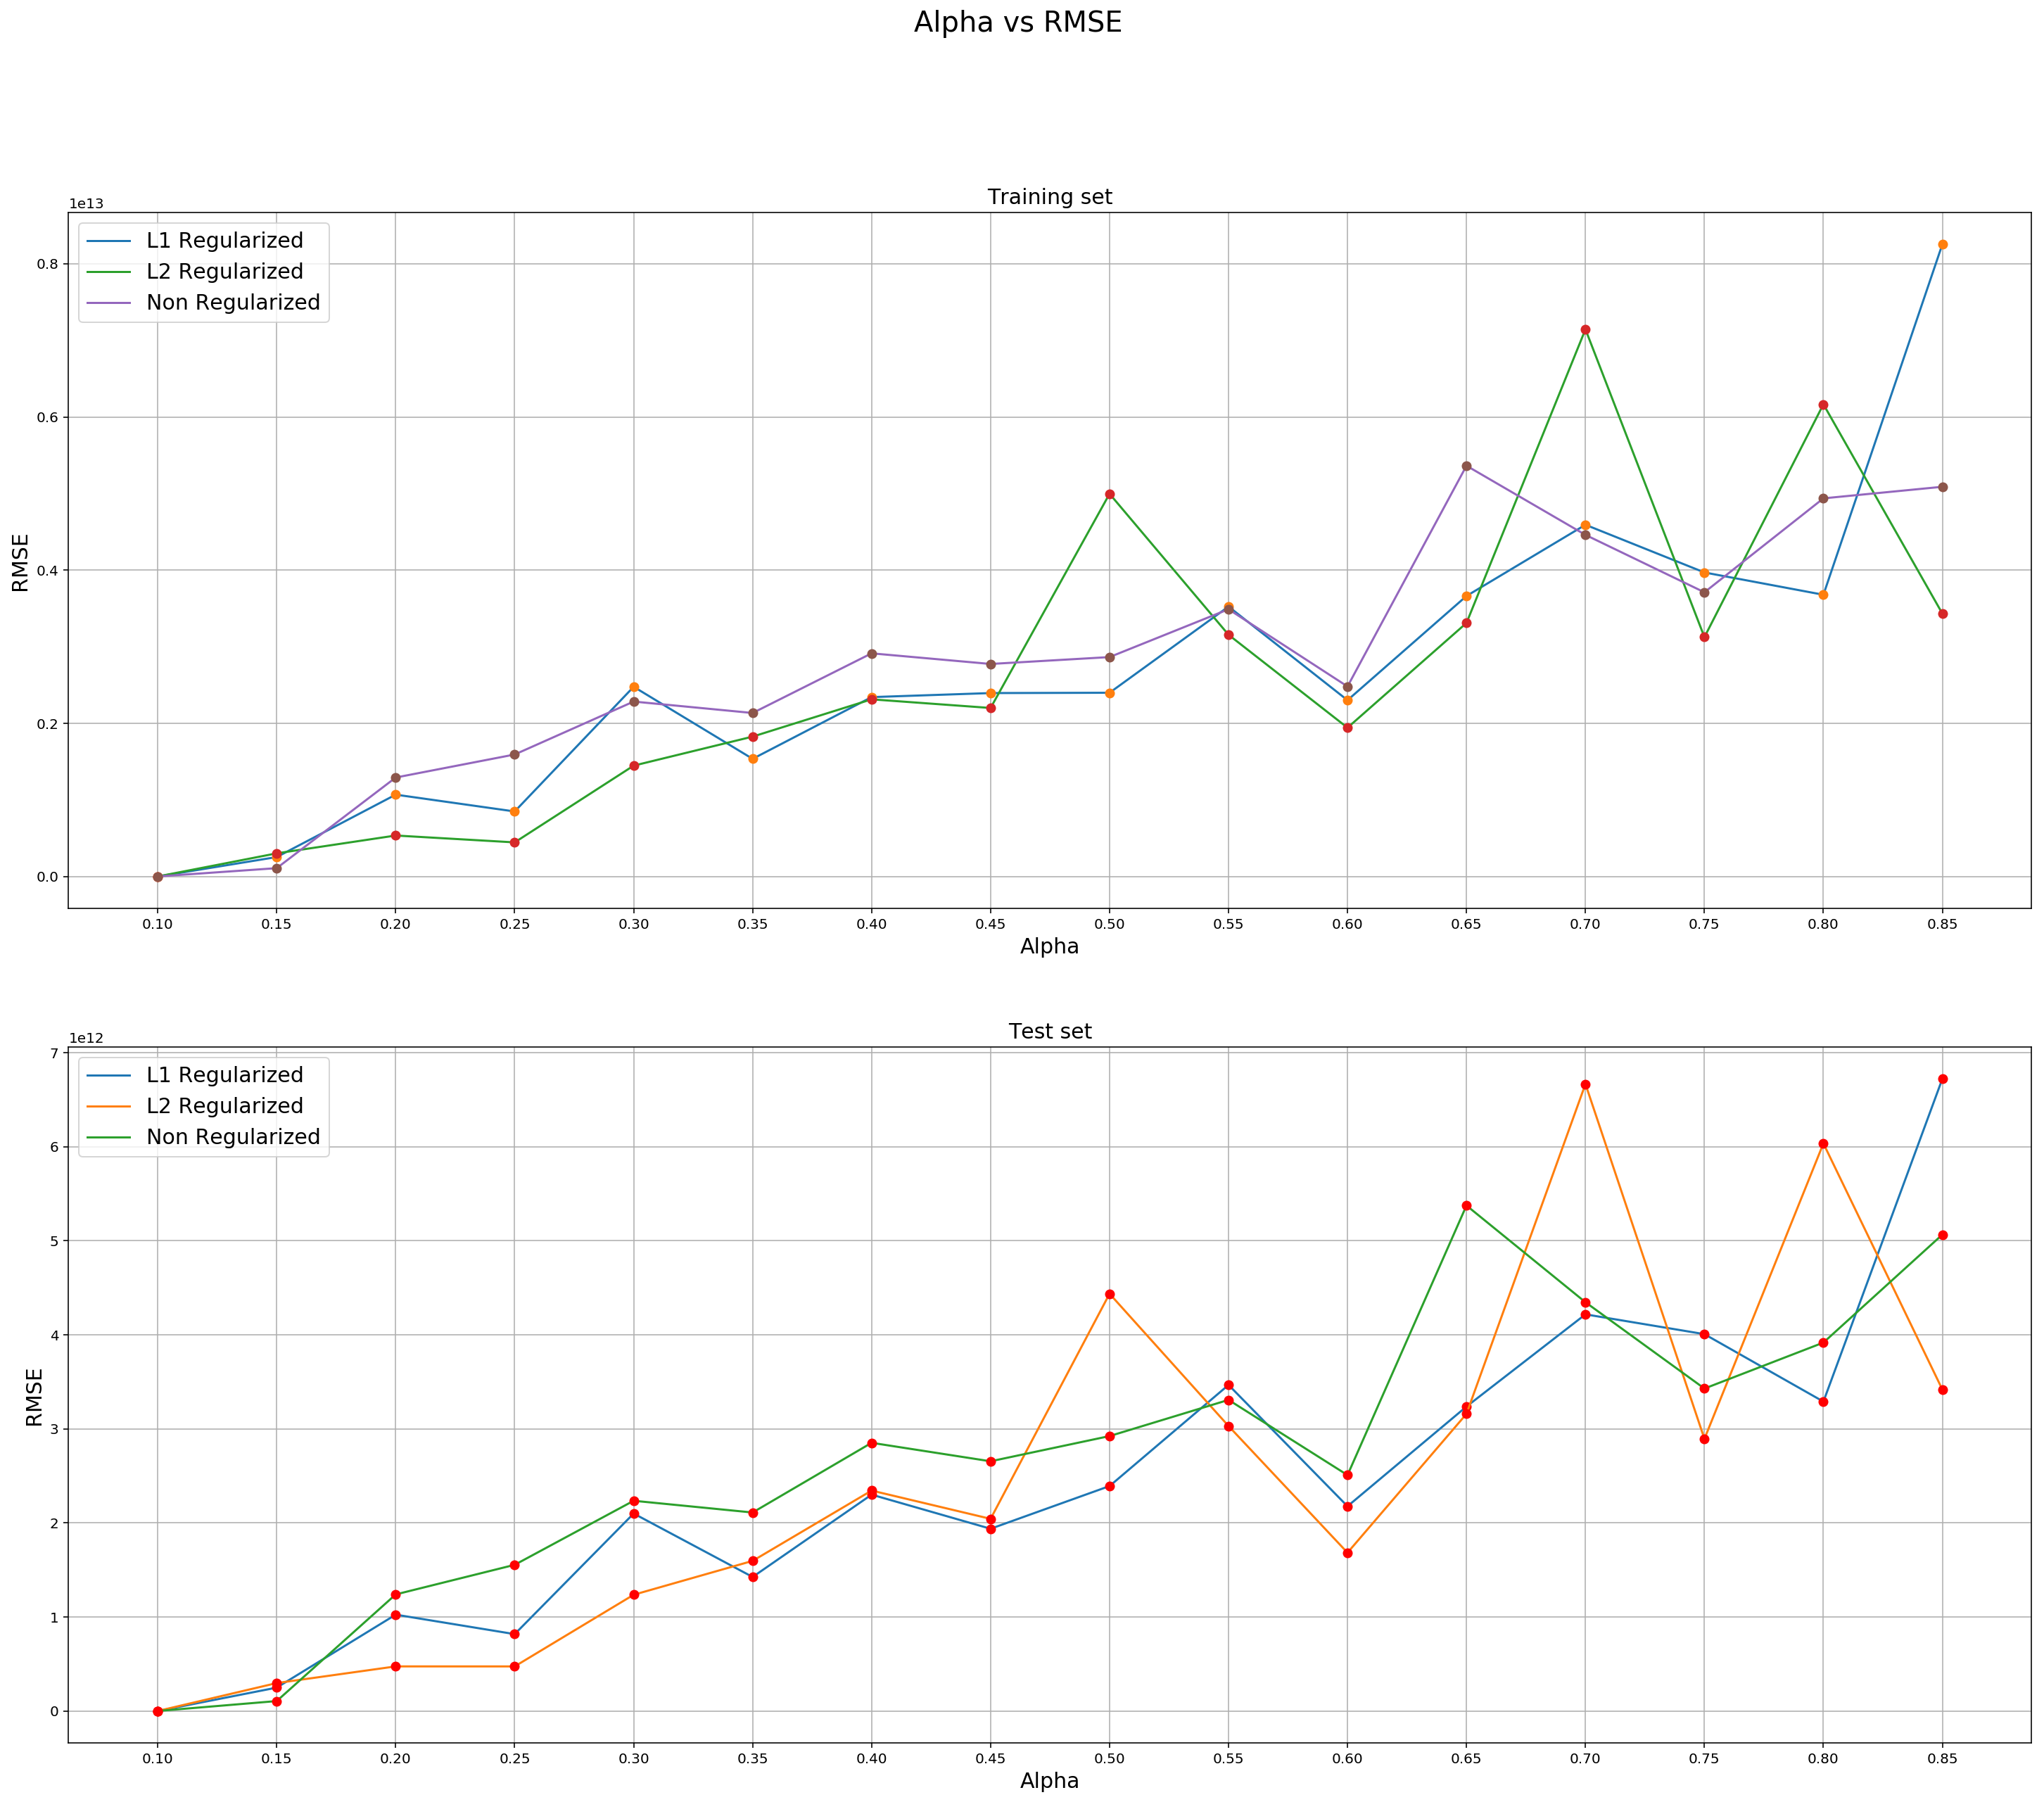

In [70]:
fig, axs = plt.subplots(2, 1, figsize=(25, 20))

fig.suptitle("Alpha vs RMSE", fontsize = 20)
axs[0].plot(learningRates, trainRMSERegL1, label = "L1 Regularized")
axs[0].plot(learningRates, trainRMSERegL1, "o")

axs[0].plot(learningRates, trainRMSERegL2, label = "L2 Regularized")
axs[0].plot(learningRates, trainRMSERegL2, "o")

axs[0].plot(learningRates, trainRMSENoReg, label = "Non Regularized")
axs[0].plot(learningRates, trainRMSENoReg, "o")

axs[0].grid()
axs[0].set_xticks(learningRates)
axs[0].set_xlabel('Alpha', fontsize = 15)
axs[0].set_ylabel('RMSE', fontsize = 15)
axs[0].set_title("Training set", fontsize = 15)
axs[0].legend(prop={'size': 15})

axs[1].plot(learningRates, testRMSERegL1, label = "L1 Regularized")
axs[1].plot(learningRates, testRMSERegL1, "ro")

axs[1].plot(learningRates, testRMSERegL2, label = "L2 Regularized")
axs[1].plot(learningRates, testRMSERegL2, "ro")

axs[1].plot(learningRates, testRMSENoReg, label = "Non Regularized")
axs[1].plot(learningRates, testRMSENoReg, "ro")

axs[1].grid()
axs[1].set_xticks(learningRates)
axs[1].set_xlabel('Alpha', fontsize = 15)
axs[1].set_ylabel('RMSE', fontsize = 15)
axs[1].set_title("Test set", fontsize = 15)
axs[1].legend(prop={'size': 15})
                  
plt.show()

Without adding the regularization term the non regularized model is performing better on train set when compared with L1(Lasso) and L2(Ridge) regularized model. This is because of the model tends to <b>overfit</b>. It performs good on training set. But the second graph shows the results on test set. We see that model performs poorly on test set when compared to L1 and L2 regularized.<br>
<b>Underfitting</b> When the model is too simple to capture the trend in the data. This is called underfitting.

## Grid Search

In [79]:
from sklearn.model_selection import GridSearchCV

"""Gridsearch is best way to find optimal hyper parameters"""

"""Grid for searching"""
param_grid = [
    {
        "regression__learning_rate" : ["constant"],
        "regression__eta0" :  np.arange(0.1, 0.9, 0.05),
        "regression__penalty" : [None] 
    },
    {
        "regression__learning_rate" : ["constant"],
        "regression__penalty" : ["l1"],
        "regression__alpha" : np.arange(0.1, 0.9, 0.05),
        "regression__eta0" :  np.arange(0.1, 0.9, 0.05)
    },
    {
        "regression__learning_rate" : ["constant"],
        "regression__penalty" : ["l2"],
        "regression__alpha" : np.arange(0.1, 0.9, 0.05),
        "regression__eta0" : np.arange(0.1, 0.9, 0.05)
    }
]

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=3)]: Done  48 out of  48 | elapsed:    0.3s finished


Best model for given parameter grid 
{'regression__eta0': 0.10000000000000001, 'regression__penalty': None, 'regression__learning_rate': 'constant'}



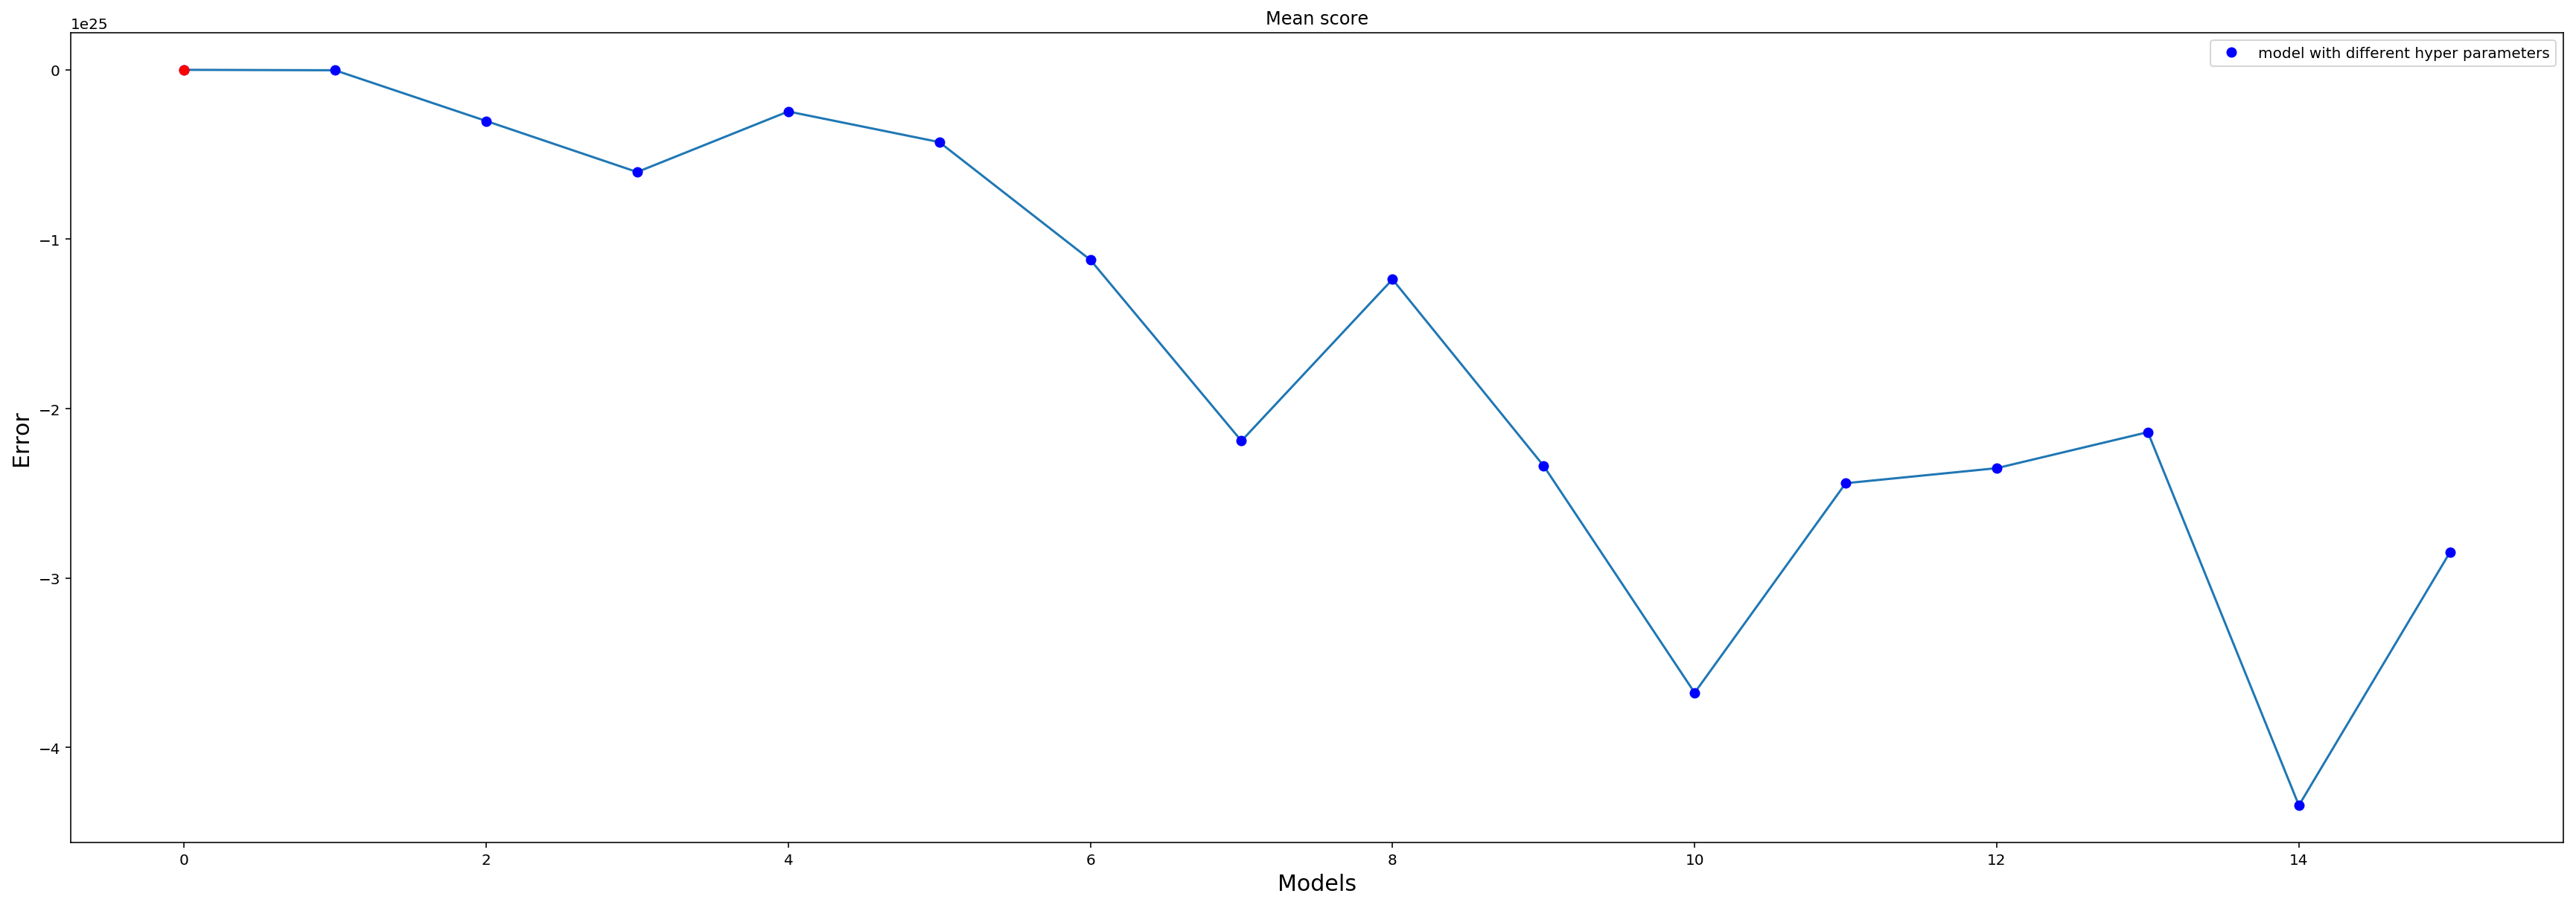

Best score -5.94595562283e+13


In [72]:
gridNonRegularized = GridSearchCV(trainingPipeline, cv = 3, n_jobs = 3, param_grid = param_grid[0], verbose = 1, refit = True)
gridNonRegularized.fit(xTrain, yTrain)
print("Best model for given parameter grid \n" + str(gridNonRegularized.best_params_) + "\n")

plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(gridNonRegularized.cv_results_["mean_test_score"])
plt.plot(gridNonRegularized.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.plot(gridNonRegularized.best_score_, "ro")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

print("Best score " + str(gridNonRegularized.best_score_))

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=3)]: Done 462 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done 768 out of 768 | elapsed:    2.8s finished


Best model for given parameter grid 
{'regression__eta0': 0.10000000000000001, 'regression__penalty': 'l2', 'regression__alpha': 0.8500000000000002, 'regression__learning_rate': 'constant'}



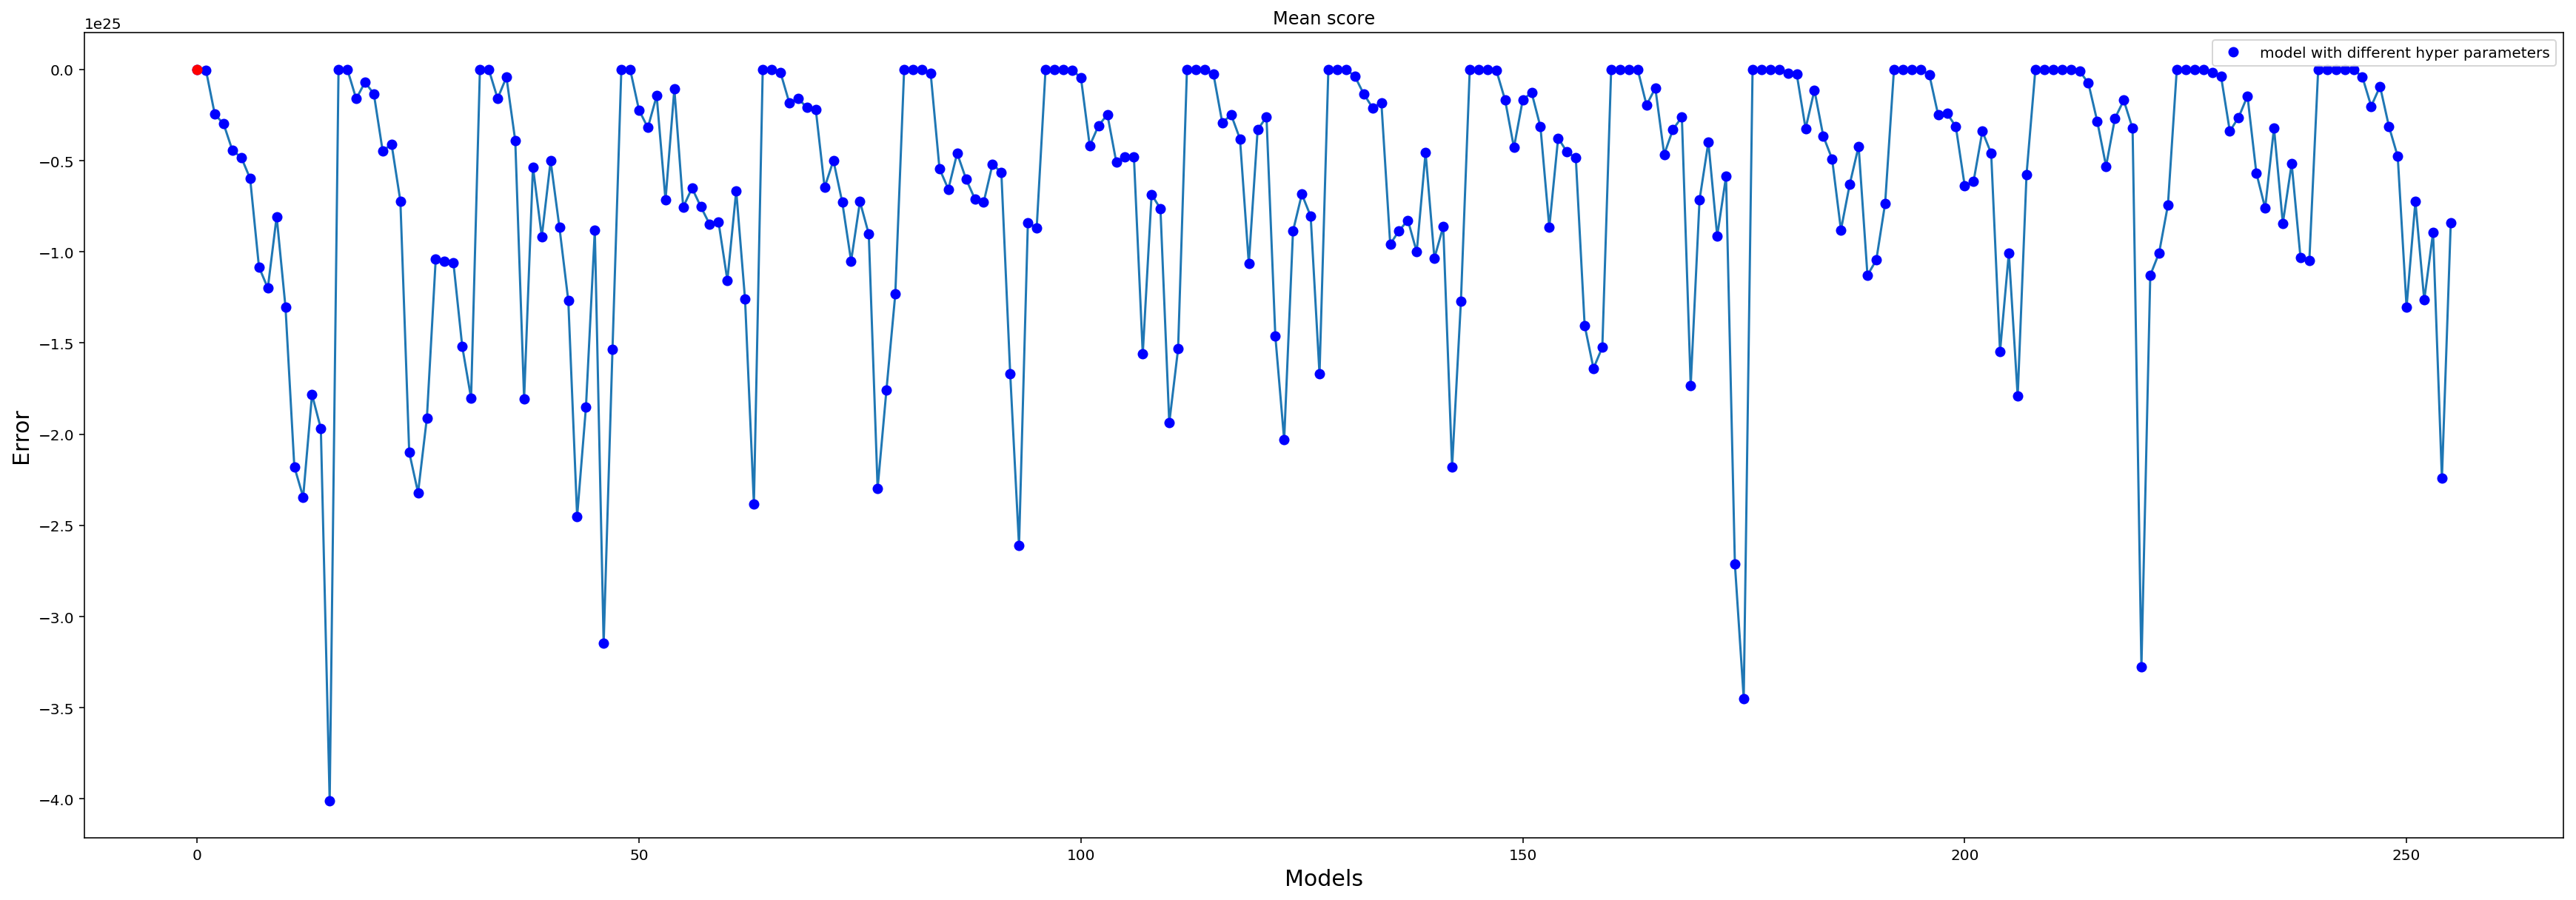

Best score 0.0620692352875


In [73]:
gridL1 = GridSearchCV(trainingPipeline, cv = 3, n_jobs = 3, param_grid = param_grid[2], verbose = 1, refit = True)
gridL1.fit(xTrain, yTrain)
print("Best model for given parameter grid \n" + str(gridL1.best_params_) + "\n")

plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(gridL1.cv_results_["mean_test_score"])
plt.plot(gridL1.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.plot(gridL1.best_score_, "ro")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

print("Best score " + str(gridL1.best_score_))

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=3)]: Done 462 tasks      | elapsed:    1.9s
[Parallel(n_jobs=3)]: Done 768 out of 768 | elapsed:    2.9s finished


Best model for given parameter grid 
{'regression__eta0': 0.10000000000000001, 'regression__penalty': 'l1', 'regression__alpha': 0.10000000000000001, 'regression__learning_rate': 'constant'}



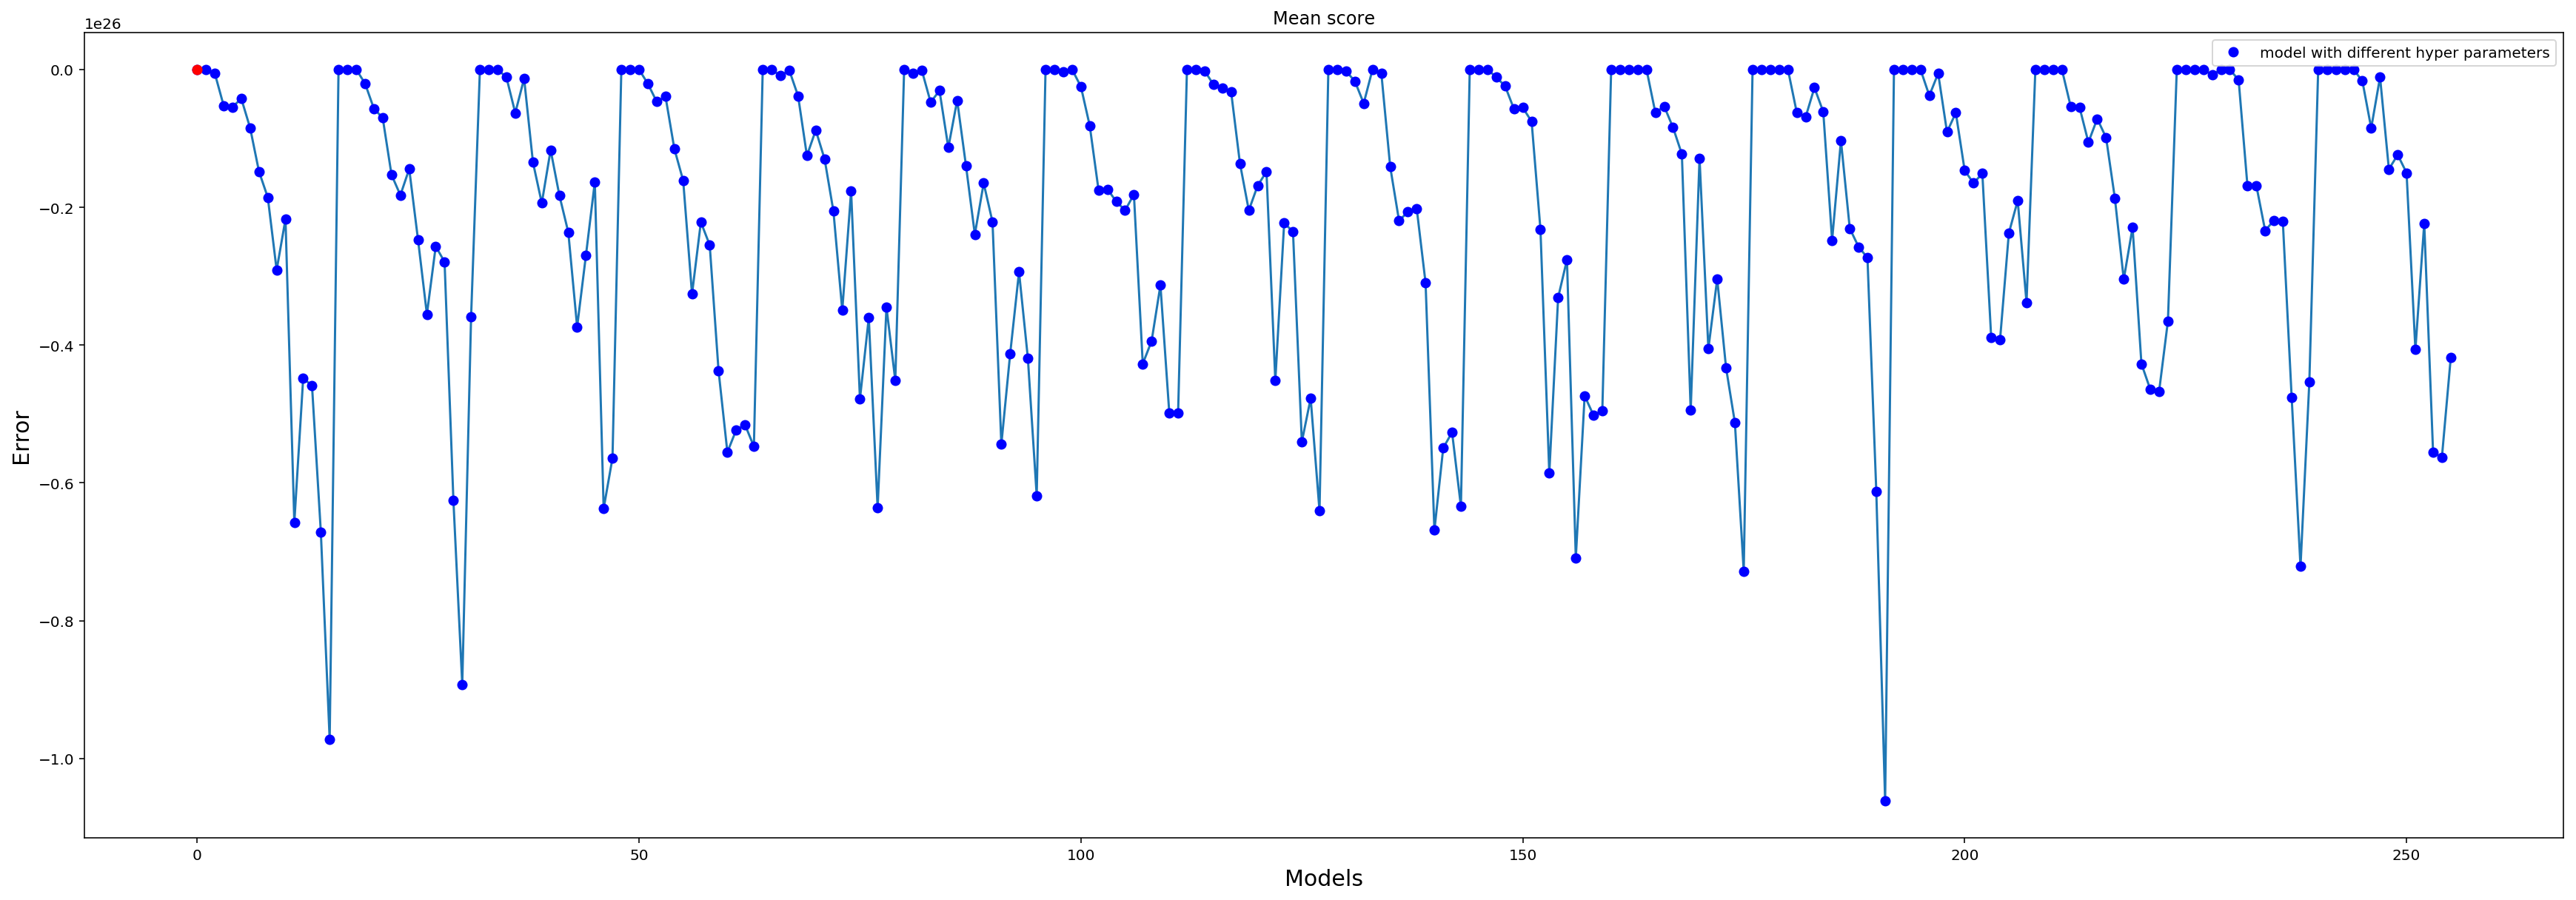

Best score 0.19850417169


In [74]:
gridL2 = GridSearchCV(trainingPipeline, cv = 3, n_jobs = 3, param_grid = param_grid[1], verbose = 1, refit = True)
gridL2.fit(xTrain, yTrain)
print("Best model for given parameter grid \n" + str(gridL2.best_params_) + "\n")

plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(gridL2.cv_results_["mean_test_score"])
plt.plot(gridL2.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.plot(gridL2.best_score_, "ro")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

print("Best score " + str(gridL2.best_score_))

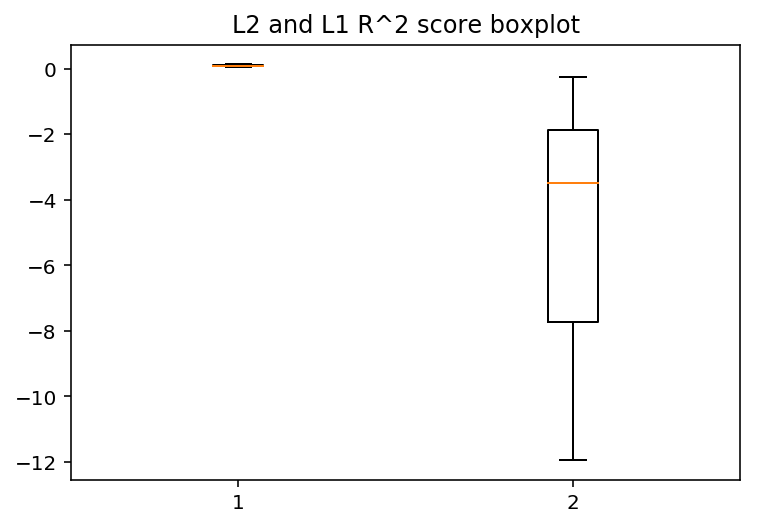

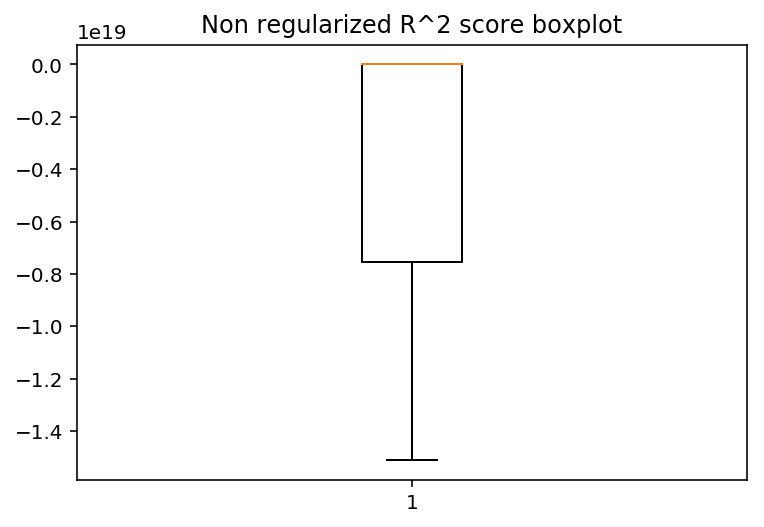

In [83]:
from sklearn.model_selection import cross_val_score

scoreNonReg = cross_val_score(trainingPipeline.set_params(**gridNonRegularized.best_params_), xTrain, yTrain)
scoreL1 = cross_val_score(trainingPipeline.set_params(**gridL1.best_params_), xTrain, yTrain)
scoreL2 = cross_val_score(trainingPipeline.set_params(**gridL2.best_params_), xTrain, yTrain)


plt.boxplot([scoreL2, scoreL1])
plt.title("L2 and L1 R^2 score boxplot")
plt.show()
plt.boxplot([scoreNonReg])
plt.title("Non regularized R^2 score boxplot")
plt.show()

PS:- MSE scores are negative https://github.com/scikit-learn/scikit-learn/issues/2439
<br>From boxplot we can see that the spread of error is very less for L1 and L2 regularized model. L1 is performing better among these two. The non regularized is not performing so good. The spread of error is also more.